#### IMPORTS

In [1]:
import pandas as pd
import networkx as nx
import os

#### EXTRACTING TED FOR FRANCE AND CLEANING

In [34]:
ted = pd.read_csv('/Users/wiktorrajca/Documents/GitHub/Data-Science-Honors-Thesis/ted_all.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [5]:
nan_count = ted['WIN_NAME'].isna().sum()
print(f"Missing VALUE_EURO entries: {nan_count}")
total = len(ted)
pct_missing = nan_count / total * 100
print(f"{pct_missing:.2f}% of VALUE_EURO is missing")

Missing VALUE_EURO entries: 2136202
20.35% of VALUE_EURO is missing


In [6]:
ted_clean = ted.dropna(subset = ['WIN_NAME'])

In [9]:
ted_french = ted_clean[ted_clean['WIN_COUNTRY_CODE'].str[:2] == 'FR']

In [11]:
ted_french.to_csv('ted_french_full')

In [13]:
ted_italian = ted_clean[ted_clean['WIN_COUNTRY_CODE'].str[:2] == 'IT']

In [14]:
ted_italian.shape

(279617, 75)

In [15]:
ted_italian.to_csv('ted_italian_full')

### After merge

In [2]:
french_merge_1 = pd.read_csv('/Users/wiktorrajca/Documents/GitHub/Data-Science-Honors-Thesis/code/french_merge_full/merged_result_1.csv')

/var/folders/r2/9vnxdxyd26380tms_8k538b40000gn/T/ipykernel_65741/3259451970.py:1: DtypeWarning: Columns (9,11,15,17,18,19,24,25,34,44,47,56,58,61,63) have mixed types. Specify dtype option on import or set low_memory=False.
  french_merge_1 = pd.read_csv('/Users/wiktorrajca/Documents/GitHub/Data-Science-Honors-Thesis/code/french_merge_full/merged_result_1.csv')


In [5]:
french_merge_1.shape

(152788, 78)

In [6]:
french_merge_1_filtered = french_merge_1[
    french_merge_1['WIN_COUNTRY_CODE'].str[:2] == french_merge_1['bvdidnumber'].astype(str).str[:2]
]

In [7]:
french_merge_1_filtered.shape

(78457, 78)

In [1]:
import os
import pandas as pd

def load_and_filter_csvs(directory_path):
    all_dfs = []

    for filename in os.listdir(directory_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory_path, filename)
            df = pd.read_csv(file_path)

            # Ensure both columns are treated as strings
            df['WIN_COUNTRY_CODE'] = df['WIN_COUNTRY_CODE'].astype(str)
            df['bvdidnumber'] = df['bvdidnumber'].astype(str)

            # Filter rows
            df_filtered = df[df['WIN_COUNTRY_CODE'].str[:2] == df['bvdidnumber'].str[:2]]

            all_dfs.append(df_filtered)

    # Combine all filtered DataFrames into one
    combined_df = pd.concat(all_dfs, ignore_index=True)
    return combined_df

In [13]:
full_france_merged_filtered = load_and_filter_csvs('/Users/wiktorrajca/Documents/GitHub/Data-Science-Honors-Thesis/code/french_merge_full')

/var/folders/r2/9vnxdxyd26380tms_8k538b40000gn/T/ipykernel_65741/1273740770.py:10: DtypeWarning: Columns (9,14,15,17,18,19,21,24,25,34,44,47,56,58,61,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/r2/9vnxdxyd26380tms_8k538b40000gn/T/ipykernel_65741/1273740770.py:10: DtypeWarning: Columns (9,11,15,17,18,19,21,24,25,34,44,47,53,56,58,61,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/r2/9vnxdxyd26380tms_8k538b40000gn/T/ipykernel_65741/1273740770.py:10: DtypeWarning: Columns (9,11,14,15,17,18,19,24,25,34,44,47,53,56,58,61,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/r2/9vnxdxyd26380tms_8k538b40000gn/T/ipykernel_65741/1273740770.py:10: DtypeWarning: Columns (9,11,14,15,17,18,19,24,25,34,47,56,58,61,63) have mixed types. Specify dtype option on import or set low_memory=Fa

In [17]:
full_france_merged_filtered.to_csv("french_merge_full/french_merge_full_filtered.csv")

In [3]:
full_italy_merged_filtered = load_and_filter_csvs('/Users/wiktorrajca/Documents/GitHub/Data-Science-Honors-Thesis/code/italian_merge_full')

/var/folders/r2/9vnxdxyd26380tms_8k538b40000gn/T/ipykernel_76190/1273740770.py:10: DtypeWarning: Columns (19,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/r2/9vnxdxyd26380tms_8k538b40000gn/T/ipykernel_76190/1273740770.py:10: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/r2/9vnxdxyd26380tms_8k538b40000gn/T/ipykernel_76190/1273740770.py:10: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/r2/9vnxdxyd26380tms_8k538b40000gn/T/ipykernel_76190/1273740770.py:10: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/r2/9vnxdxyd26380tms_8k538b40000gn/T/ipykernel_76190/1273740770.py:10: DtypeWarning: Columns (9,15,17,18,19,24,25,34,47,53,56,58,

In [4]:
full_italy_merged_filtered.to_csv("italian_merge_full/italian_merge_full_filtered.csv")

### BUILDING THE GRAPH

In [5]:
def load_or_initialize_graph(country_code):
    """
    Loads an existing graph from GraphML if available, otherwise initializes a new one.
    """
    if os.path.exists(f"procurement_graph_{country_code}.graphml"):
        print(f"✅ Loading existing graph from procurement_graph_{country_code}.graphml...")
        return nx.read_graphml(f"procurement_graph_{country_code}.graphml")
    
    print("🔍 Creating a new graph...")
    return nx.DiGraph()  # Initialize empty graph

def add_procurement_winners(G, country_code, procurement_df):
    """
    Processes the procurement DataFrame grouped by 'Unnamed: 0'. In this DiGraph:
      - Each procurement group produces one procurement node.
      - For each procurement group, company nodes are added (based on 'bvdidnumber')
        and an edge is added from the company node to the procurement node.
    
    Debug output (limited summary):
      - Prints a sample (first 5 rows) of the procurement group’s data.
      - Prints the unique, cleaned company IDs and their count.
      - Prints each edge addition attempt.
      - For each procurement, prints the full list of incoming neighbors using G.predecessors(procurement_key)
        and then filters these to list only those with "type" == "Company".
      - For procurement "24", prints detailed neighbor info.
    
    For each procurement group:
      - If any row has both WIN_COUNTRY_CODE and the company’s bvdidnumber prefix matching the target country_code,
        only those rows are used (with "country_matched" = True);
      - Otherwise, all rows in the group are used (with "country_matched" = False).
    
    Likelihood is computed as 1 divided by the number of unique companies in the selected group.
    Both procurement and company IDs are converted to strings (and stripped) for consistency.
    """
    added_procurements = 0
    added_edges = 0

    grouped = procurement_df.groupby('Unnamed: 0')

    for procurement_id, group in grouped:
        procurement_key = str(procurement_id).strip()
        
        # Copy and ensure key columns are strings without extraneous whitespace.
        group = group.copy()
        group['WIN_COUNTRY_CODE'] = group['WIN_COUNTRY_CODE'].astype(str).str.strip()
        group['bvdidnumber'] = group['bvdidnumber'].astype(str).str.strip()
        
        # print(f"\n--- Processing Procurement {procurement_key} ---")
        # print("Sample group data (first 5 rows):")
        # print(group[['WIN_COUNTRY_CODE', 'bvdidnumber']].head())
        
        # Use strict matching if possible.
        strict_mask = (group['WIN_COUNTRY_CODE'].str[:2] == country_code) & (group['bvdidnumber'].str[:2] == country_code)
        if strict_mask.any():
            selected = group[strict_mask]
            country_matched_val = True
            # print("Using strict matching rows (country_matched: True)")
        else:
            selected = group
            country_matched_val = False
            # print("No strict match found; using all rows (country_matched: False)")
        
        # Determine unique company IDs.
        unique_company_ids = selected['bvdidnumber'].unique().tolist()
        unique_company_ids = [cid.strip() for cid in unique_company_ids]
        unique_companies = len(unique_company_ids)
        likelihood = 1 / unique_companies
        
        # print(f"Unique company IDs for procurement {procurement_key}: {unique_company_ids}")
        # print(f"Computed unique companies = {unique_companies} and likelihood = {likelihood:.4f}")
        
        # Add or update the procurement node.
        if procurement_key not in G:
            G.add_node(procurement_key, type="Procurement", unique_companies_count=unique_companies)
            added_procurements += 1
            # print(f"Procurement node {procurement_key} added.")
        else:
            G.nodes[procurement_key]['unique_companies_count'] = unique_companies
            # print(f"Procurement node {procurement_key} updated with unique_companies_count.")
        
        # Process each selected row.
        for _, row in selected.iterrows():
            company_id = row['bvdidnumber'].strip()
            company_attributes = row.to_dict()
            company_attributes.update({
                "type": "Company",
                "bid_winner": True,
                "likelyhood": likelihood,
                "country_matched": country_matched_val,
                "the_name": row['name'],
                "the_country": row['WIN_COUNTRY_CODE'],
                "the_town": row['WIN_TOWN'],
                "the_postal_code": row['WIN_POSTAL_CODE'],
                "the_identifier": row['WIN_NATIONALID']
            })
            
            if company_id not in G:
                G.add_node(company_id, **company_attributes)
                # print(f"Company node {company_id} added.")
            else:
                G.nodes[company_id].setdefault("likelyhood", likelihood)
                G.nodes[company_id].setdefault("country_matched", country_matched_val)
                # print(f"Company node {company_id} exists; attributes ensured.")
            
            # print(f"Attempting to add edge from company {company_id} to procurement {procurement_key}")
            if not G.has_edge(company_id, procurement_key):
                G.add_edge(company_id, procurement_key, relationship='WON')
                added_edges += 1
                # print(f"Edge added from {company_id} to {procurement_key}")
            else:
                print(f"Edge from {company_id} to {procurement_key} already exists.")
        
        # # Debug: Print full list of incoming neighbors (predecessors) for this procurement.
        # all_predecessors = list(G.predecessors(procurement_key))
        # print(f"All incoming neighbors for procurement {procurement_key}: {all_predecessors}")
        
        # # Now filter to those with type 'Company'.
        # company_predecessors = [nbr for nbr in all_predecessors if G.nodes[nbr].get("type") == "Company"]
        # print(f"Filtered company neighbors for procurement {procurement_key}: {company_predecessors}")
        
        # if procurement_key == '24':
        #     print(f"Detailed neighbor info for procurement {procurement_key}:")
        #     for nbr in all_predecessors:
        #         print(f"Neighbor {nbr} attributes: {G.nodes[nbr]}")
    
    print(f"\n✅ Added {added_procurements} procurement nodes, {added_edges} company-procurement edges.")
    return G

def lowest_likelihood_group(G):
    """
    Finds the procurement group (a procurement node along with its connected companies)
    from a directed graph G (DiGraph) that has more than one company (i.e., multi-winner)
    and returns the group that has the lowest likelihood value.
    
    The likelihood for a procurement is computed as 1 / (number of companies in the group),
    so a lower likelihood indicates that more companies are connected.
    
    Returns:
        dict: A dictionary containing the procurement key, the list of company nodes,
              and the common likelihood value for that group. For example:
                {
                  "procurement": <procurement_node_key>,
                  "companies": [<company_node_id>, ...],
                  "likelihood": <lowest_likelihood_value>
                }
        If no multi-winner procurement is found, returns an empty dict.
    """
    # First, create a dictionary of all procurement groups with more than one company.
    multi_winner = {}
    # Iterate over all procurement nodes (we assume they have "type" == "Procurement")
    for node, data in G.nodes(data=True):
        if data.get("type") == "Procurement":
            # In a DiGraph, companies are incoming neighbors (predecessors)
            companies = [nbr for nbr in G.predecessors(node) 
                         if G.nodes[nbr].get("type") == "Company"]
            if len(companies) > 1:
                # We assume all companies share the same likelihood (as computed during node creation)
                likelihood = G.nodes[companies[0]].get("likelyhood")
                multi_winner[node] = {
                    "companies": companies,
                    "likelihood": likelihood
                }
    
    if not multi_winner:
        return {}
    
    # Find the procurement (key) with the lowest likelihood value.
    lowest_procurement = min(multi_winner.keys(), key=lambda k: multi_winner[k]["likelihood"])
    
    result = {
        "procurement": lowest_procurement,
        "number of members": 1/multi_winner[lowest_procurement]["likelihood"],
        "likelihood": multi_winner[lowest_procurement]["likelihood"],
        "companies": multi_winner[lowest_procurement]["companies"]
    }
    
    return result

def check_procurements_with_multiple_companies(G):
    """
    Checks which procurement nodes are connected to more than one company.
    
    Returns:
        list: A list of procurement node keys with more than one company neighbor.
    """
    multi_company_procurements = []
    for node, attr in G.nodes(data=True):
        if attr.get("type") == "Procurement":
            # For DiGraph, the associated companies are stored as predecessors.
            company_predecessors = [nbr for nbr in G.predecessors(node) if G.nodes[nbr].get("type") == "Company"]
            if len(company_predecessors) > 1:
                multi_company_procurements.append(node)
                print(f"Procurement node {node} is connected to {len(company_predecessors)} companies.")
    if not multi_company_procurements:
        print("No procurement nodes are connected to more than one company.")
    return multi_company_procurements

def check_graph_integrity(G):
    """
    Checks if the graph meets integrity expectations:
    - No orphan nodes (nodes with no edges)
    - Only isolated pairs are connected by 'WON' edges
    """
    print("🧪 Running graph integrity checks...")

    # 1. Orphan nodes
    orphan_nodes = [n for n in G.nodes if G.degree(n) == 0]
    if orphan_nodes:
        print(f"❌ Found {len(orphan_nodes)} orphan nodes.")
    else:
        print("✅ No orphan nodes found.")

    # 2. Isolated pairs must be connected only by 'WON' edges
    only_one_edge = []
    for u, v in G.edges:
        if G.degree(u) == 1 and G.degree(v) == 1:
            rel = G.edges[u, v].get("relationship")
            if rel != "WON":
                only_one_edge.append((u, v, rel))

    if only_one_edge:
        print(f"❌ Found {len(only_one_edge)} node pairs connected only by non-WON edges.")
        for u, v, rel in only_one_edge[:5]:  # Show a few examples
            print(f"   - ({u}, {v}) via {rel}")
    else:
        print("✅ All isolated pairs are connected by 'WON' edges only.")

    print("🧪 Integrity check complete.\n")

In [13]:
graph = load_or_initialize_graph('france')

🔍 Creating a new graph...


In [6]:
graph_it = load_or_initialize_graph('it')

🔍 Creating a new graph...


In [8]:
full_france_merged_filtered = pd.read_csv('/Users/wiktorrajca/Documents/GitHub/Data-Science-Honors-Thesis/code/french_merge_full/french_merge_full_filtered.csv')

/var/folders/r2/9vnxdxyd26380tms_8k538b40000gn/T/ipykernel_71712/1912202494.py:1: DtypeWarning: Columns (10,16,18,19,20,22,25,26,35,45,48,57,59,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  full_france_merged_filtered = pd.read_csv('/Users/wiktorrajca/Documents/GitHub/Data-Science-Honors-Thesis/code/french_merge_full/french_merge_full_filtered.csv')


In [14]:
add_procurement_winners(graph, 'FR', full_france_merged_filtered)


✅ Added 133460 procurement nodes, 467411 company-procurement edges.


In [7]:
full_italy_merged_filtered = pd.read_csv('/Users/wiktorrajca/Documents/GitHub/Data-Science-Honors-Thesis/code/italian_merge_full/italian_merge_full_filtered.csv')

/var/folders/r2/9vnxdxyd26380tms_8k538b40000gn/T/ipykernel_87218/2887423521.py:1: DtypeWarning: Columns (10,16,18,19,20,25,26,35,48,54,57,59,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  full_italy_merged_filtered = pd.read_csv('/Users/wiktorrajca/Documents/GitHub/Data-Science-Honors-Thesis/code/italian_merge_full/italian_merge_full_filtered.csv')


In [8]:
add_procurement_winners(graph_it, 'IT', full_italy_merged_filtered)


✅ Added 40869 procurement nodes, 622577 company-procurement edges.


In [20]:
check_graph_integrity(graph)

🧪 Running graph integrity checks...
✅ No orphan nodes found.
✅ All isolated pairs are connected by 'WON' edges only.
🧪 Integrity check complete.



In [9]:
check_graph_integrity(graph_it)

🧪 Running graph integrity checks...
✅ No orphan nodes found.
✅ All isolated pairs are connected by 'WON' edges only.
🧪 Integrity check complete.



### MATCHING ENTITIES

In [ ]:
import os
import pandas as pd
import networkx as nx
from tqdm import tqdm

def add_matching_entities(G, df, source_column, target_column, the_name, first_name, country_code, town, relationship_type):
    """
    Adds nodes and edges to the graph only if the `source_column` matches an existing node.
    If `target_column` already exists in the graph, only adds the edge if it doesn’t exist.
    Also stores full row data for each new node.
    """
    if len(G) == 0:
        print("⚠️ Graph is empty. Skipping entity matching.")
        return
    existing_nodes = set(G.nodes)
    existing_edges = set(G.edges)

    for _, row in tqdm(df.iterrows(), total=len(df), desc=f"→ {relationship_type} rows processed"):
        source_id = row[source_column]
        target_id = row[target_column]
        if pd.isna(row[target_column]):
            continue
        if source_id in existing_nodes and G.nodes[source_id].get("bid_winner") == True:
            if target_id not in existing_nodes:
                node_attributes = row.to_dict()
                node_attributes["type"] = "Person" if first_name in row and pd.notna(row[first_name]) else "Company"
                node_attributes['the_name'] = row[the_name]
                node_attributes['the_country'] = row[country_code]
                node_attributes['the_town'] = row[town]
                G.add_node(target_id, **node_attributes)
                existing_nodes.add(target_id)

            if (target_id, source_id) not in existing_edges:
                G.add_edge(target_id, source_id, relationship=relationship_type)
                existing_edges.add((target_id, source_id))

    print(f"✅ {relationship_type} relationships updated. Graph now has {len(G.nodes)} nodes and {len(G.edges)} edges.")


def load_and_match_all(graph, shareholders_path, subsidiaries_path, basic_shareholders_path):
    from tqdm import tqdm
    folder_config = {
        shareholders_path: {
            "source_column": "bvdidnumber",
            "target_column": "shareholderbvdidnumber",
            "the_name": "shareholdername",
            "first_name": "shareholderfirstname",
            "country_code": "shareholdercountryisocode",
            "town": "shareholdercity",
            "relationship_type": "SHAREHOLDER_OF"
        },
        subsidiaries_path: {
            "source_column": "bvdidnumber",
            "target_column": "subsidiarybvdidnumber",
            "the_name": "subsidiaryname",
            "first_name": "subsidiaryfirstname",
            "country_code": "subsidiarycountryisocode",
            "town": "subsidiarycity",
            "relationship_type": "SUBSIDIARY_OF"
        },
        basic_shareholders_path: [
            {
                "source_column": "bvdidnumber",
                "target_column": "duobvdidnumber",
                "the_name": "duoname",
                "first_name": "duofirstname",
                "country_code": "duocountryisocode",
                "town": "duocity",
                "relationship_type": "DOMESTIC_ULTIMATE_OWNER_OF"
            },
            {
                "source_column": "bvdidnumber",
                "target_column": "guobvdidnumber",
                "the_name": "guoname",
                "first_name": "guofirstname",
                "country_code": "guocountryisocode",
                "town": "guocity",
                "relationship_type": "GLOBAL_ULTIMATE_OWNER_OF"
            }
        ]
    }

    for folder, configs in folder_config.items():
        if isinstance(configs, dict):
            configs = [configs]

        file_list = [f for f in os.listdir(folder) if f.endswith(".csv")]
        for file_name in tqdm(file_list, desc=f"📂 Processing files in {folder}"):
            file_path = os.path.join(folder, file_name)
            df = pd.read_csv(file_path, dtype=str)
            for config in configs:
                add_matching_entities(
                    graph,
                    df,
                    source_column=config["source_column"],
                    target_column=config["target_column"],
                    the_name=config["the_name"],
                    first_name=config["first_name"],
                    country_code=config["country_code"],
                    town=config["town"],
                    relationship_type=config["relationship_type"]
                )

# import os
# import pandas as pd
# import networkx as nx
# from tqdm import tqdm
# from concurrent.futures import ThreadPoolExecutor, as_completed

# def read_csv_with_config(file_path, config):
#     df = pd.read_csv(file_path, dtype=str)
#     return df, config, os.path.basename(file_path)

# def add_matching_entities(G, df, source_column, target_column, the_name, first_name, country_code, town, relationship_type):
#     if len(G) == 0:
#         print("⚠️ Graph is empty. Skipping entity matching.")
#         return
#     existing_nodes = set(G.nodes)
#     existing_edges = set(G.edges)

#     for _, row in tqdm(df.iterrows(), total=len(df), desc=f"→ {relationship_type} rows processed", leave=False):
#         source_id = row[source_column]
#         target_id = row[target_column]
#         if pd.isna(row[target_column]):
#             continue
#         if source_id in existing_nodes and G.nodes[source_id].get("bid_winner") == True:
#             if target_id not in existing_nodes:
#                 node_attributes = row.to_dict()
#                 node_attributes["type"] = "Person" if first_name in row and pd.notna(row[first_name]) else "Company"
#                 node_attributes['the_name'] = row[the_name]
#                 node_attributes['the_country'] = row[country_code]
#                 node_attributes['the_town'] = row[town]
#                 G.add_node(target_id, **node_attributes)
#                 existing_nodes.add(target_id)

#             if (target_id, source_id) not in existing_edges:
#                 G.add_edge(target_id, source_id, relationship=relationship_type)
#                 existing_edges.add((target_id, source_id))

#     print(f"✅ {relationship_type} from {df.shape[0]} rows → Graph: {len(G.nodes)} nodes, {len(G.edges)} edges.")

# def load_and_match_all(graph, shareholders_path, subsidiaries_path, basic_shareholders_path, max_threads=8):
#     folder_config = {
#         shareholders_path: [{
#             "source_column": "bvdidnumber",
#             "target_column": "shareholderbvdidnumber",
#             "the_name": "shareholdername",
#             "first_name": "shareholderfirstname",
#             "country_code": "shareholdercountryisocode",
#             "town": "shareholdercity",
#             "relationship_type": "SHAREHOLDER_OF"
#         }],
#         subsidiaries_path: [{
#             "source_column": "bvdidnumber",
#             "target_column": "subsidiarybvdidnumber",
#             "the_name": "subsidiaryname",
#             "first_name": "subsidiaryfirstname",
#             "country_code": "subsidiarycountryisocode",
#             "town": "subsidiarycity",
#             "relationship_type": "SUBSIDIARY_OF"
#         }],
#         basic_shareholders_path: [
#             {
#                 "source_column": "bvdidnumber",
#                 "target_column": "duobvdidnumber",
#                 "the_name": "duoname",
#                 "first_name": "duofirstname",
#                 "country_code": "duocountryisocode",
#                 "town": "duocity",
#                 "relationship_type": "DOMESTIC_ULTIMATE_OWNER_OF"
#             },
#             {
#                 "source_column": "bvdidnumber",
#                 "target_column": "guobvdidnumber",
#                 "the_name": "guoname",
#                 "first_name": "guofirstname",
#                 "country_code": "guocountryisocode",
#                 "town": "guocity",
#                 "relationship_type": "GLOBAL_ULTIMATE_OWNER_OF"
#             }
#         ]
#     }

#     for folder, configs in folder_config.items():
#         if not os.path.isdir(folder):
#             print(f"⚠️ Folder does not exist: {folder}")
#             continue

#         file_list = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(".csv")]
#         args_list = [(fp, config) for fp in file_list for config in (configs if isinstance(configs, list) else [configs])]

#         print(f"🧵 Reading {len(file_list)} files from {folder} with ThreadPoolExecutor...")

#         results = []
#         with ThreadPoolExecutor(max_workers=max_threads) as executor:
#             futures = [executor.submit(read_csv_with_config, fp, config) for fp, config in args_list]
#             for future in tqdm(as_completed(futures), total=len(futures), desc=f"📥 Loading files from {folder}"):
#                 results.append(future.result())

#         for df, config, fname in results:
#             print(f"🔗 Matching entities from: {fname}")
#             add_matching_entities(
#                 graph,
#                 df,
#                 source_column=config["source_column"],
#                 target_column=config["target_column"],
#                 the_name=config["the_name"],
#                 first_name=config["first_name"],
#                 country_code=config["country_code"],
#                 town=config["town"],
#                 relationship_type=config["relationship_type"]
#             )

In [23]:
load_and_match_all(graph, '/Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level', '/Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/subsidiaries_first_level', '/Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/basic_shareholder_info')

→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [06:22<00:00, 26139.98it/s]ers_first_level:   0%|          | 0/18 [00:00<?, ?it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:   6%|▌         | 1/18 [06:38<1:52:46, 398.06s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 336659 nodes and 472997 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [19:21<00:00, 8612.73it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  11%|█         | 2/18 [27:37<4:01:12, 904.55s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 339703 nodes and 476282 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:46<00:00, 60230.12it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  17%|█▋        | 3/18 [30:39<2:23:39, 574.67s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 344271 nodes and 481016 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:46<00:00, 59981.96it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  22%|██▏       | 4/18 [33:42<1:38:03, 420.25s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 349330 nodes and 486398 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [13:47<00:00, 12079.23it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  28%|██▊       | 5/18 [47:46<2:04:10, 573.12s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 356240 nodes and 493792 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:40<00:00, 62169.27it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  33%|███▎      | 6/18 [50:44<1:27:42, 438.51s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 364552 nodes and 502610 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:44<00:00, 60970.03it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  39%|███▉      | 7/18 [53:44<1:04:54, 354.02s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 368294 nodes and 506605 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:43<00:00, 61216.18it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  44%|████▍     | 8/18 [56:43<49:44, 298.45s/it]  

✅ SHAREHOLDER_OF relationships updated. Graph now has 373025 nodes and 511665 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 9999999/9999999 [02:44<00:00, 60924.44it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  50%|█████     | 9/18 [59:44<39:15, 261.67s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 409232 nodes and 561464 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:44<00:00, 60698.42it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  56%|█████▌    | 10/18 [1:02:47<31:38, 237.26s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 425229 nodes and 578514 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:46<00:00, 60106.73it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  61%|██████    | 11/18 [1:05:50<25:46, 220.93s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 443321 nodes and 599513 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:46<00:00, 59995.45it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  67%|██████▋   | 12/18 [1:08:55<20:58, 209.81s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 446846 nodes and 603296 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:46<00:00, 60135.64it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  72%|███████▏  | 13/18 [1:11:58<16:48, 201.64s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 450719 nodes and 607587 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:45<00:00, 60382.43it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  78%|███████▊  | 14/18 [1:15:01<13:04, 196.02s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 459922 nodes and 617314 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:47<00:00, 59833.23it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  83%|████████▎ | 15/18 [1:18:06<09:38, 192.68s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 474193 nodes and 632381 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:48<00:00, 59508.43it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  89%|████████▉ | 16/18 [1:21:10<06:20, 190.27s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 476994 nodes and 635557 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:47<00:00, 59557.59it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  94%|█████████▍| 17/18 [1:24:16<03:08, 188.79s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 478387 nodes and 637143 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 4311242/4311242 [01:13<00:00, 58625.51it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level: 100%|██████████| 18/18 [1:25:38<00:00, 285.45s/it]


✅ SHAREHOLDER_OF relationships updated. Graph now has 480522 nodes and 639579 edges.


→ SUBSIDIARY_OF rows processed: 100%|██████████| 9999999/9999999 [02:47<00:00, 59813.75it/s]iaries_first_level:   0%|          | 0/3 [00:00<?, ?it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/subsidiaries_first_level:  33%|███▎      | 1/3 [03:01<06:02, 181.45s/it]

✅ SUBSIDIARY_OF relationships updated. Graph now has 530147 nodes and 699901 edges.


→ SUBSIDIARY_OF rows processed: 100%|██████████| 2125877/2125877 [00:35<00:00, 60191.85it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/subsidiaries_first_level:  67%|██████▋   | 2/3 [03:40<01:37, 97.59s/it] 

✅ SUBSIDIARY_OF relationships updated. Graph now has 532850 nodes and 703566 edges.


→ SUBSIDIARY_OF rows processed: 100%|██████████| 10000000/10000000 [02:46<00:00, 60088.98it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/subsidiaries_first_level: 100%|██████████| 3/3 [06:40<00:00, 133.58s/it]


✅ SUBSIDIARY_OF relationships updated. Graph now has 539022 nodes and 711442 edges.


→ DOMESTIC_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 9999999/9999999 [02:46<00:00, 59888.56it/s]nfo:   0%|          | 0/7 [00:00<?, ?it/s]


✅ DOMESTIC_ULTIMATE_OWNER_OF relationships updated. Graph now has 540343 nodes and 722990 edges.


→ GLOBAL_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 9999999/9999999 [02:47<00:00, 59549.44it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/basic_shareholder_info:  14%|█▍        | 1/7 [06:30<39:05, 390.91s/it]

✅ GLOBAL_ULTIMATE_OWNER_OF relationships updated. Graph now has 541411 nodes and 725145 edges.


→ DOMESTIC_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 9004061/9004061 [02:34<00:00, 58392.59it/s]


✅ DOMESTIC_ULTIMATE_OWNER_OF relationships updated. Graph now has 541452 nodes and 726302 edges.


→ GLOBAL_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 9004061/9004061 [02:30<00:00, 59894.14it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/basic_shareholder_info:  29%|██▊       | 2/7 [12:29<30:59, 371.86s/it]

✅ GLOBAL_ULTIMATE_OWNER_OF relationships updated. Graph now has 541483 nodes and 726418 edges.


→ DOMESTIC_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:47<00:00, 59746.31it/s]


✅ DOMESTIC_ULTIMATE_OWNER_OF relationships updated. Graph now has 541586 nodes and 727426 edges.


→ GLOBAL_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:47<00:00, 59534.65it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/basic_shareholder_info:  43%|████▎     | 3/7 [19:04<25:29, 382.29s/it]

✅ GLOBAL_ULTIMATE_OWNER_OF relationships updated. Graph now has 541620 nodes and 727477 edges.


→ DOMESTIC_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:48<00:00, 59304.17it/s]


✅ DOMESTIC_ULTIMATE_OWNER_OF relationships updated. Graph now has 541709 nodes and 728285 edges.


→ GLOBAL_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:47<00:00, 59735.25it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/basic_shareholder_info:  57%|█████▋    | 4/7 [25:41<19:25, 388.40s/it]

✅ GLOBAL_ULTIMATE_OWNER_OF relationships updated. Graph now has 541741 nodes and 728345 edges.


→ DOMESTIC_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:48<00:00, 59301.04it/s]


✅ DOMESTIC_ULTIMATE_OWNER_OF relationships updated. Graph now has 541913 nodes and 730611 edges.


→ GLOBAL_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:48<00:00, 59503.09it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/basic_shareholder_info:  71%|███████▏  | 5/7 [32:20<13:04, 392.08s/it]

✅ GLOBAL_ULTIMATE_OWNER_OF relationships updated. Graph now has 542023 nodes and 730852 edges.


→ DOMESTIC_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:48<00:00, 59288.58it/s]


✅ DOMESTIC_ULTIMATE_OWNER_OF relationships updated. Graph now has 542090 nodes and 733561 edges.


→ GLOBAL_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:49<00:00, 59136.28it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/basic_shareholder_info:  86%|████████▌ | 6/7 [39:04<06:36, 396.25s/it]

✅ GLOBAL_ULTIMATE_OWNER_OF relationships updated. Graph now has 542120 nodes and 733619 edges.


→ DOMESTIC_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:48<00:00, 59223.41it/s]


✅ DOMESTIC_ULTIMATE_OWNER_OF relationships updated. Graph now has 542169 nodes and 734218 edges.


→ GLOBAL_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:48<00:00, 59447.50it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/basic_shareholder_info: 100%|██████████| 7/7 [45:42<00:00, 391.82s/it]

✅ GLOBAL_ULTIMATE_OWNER_OF relationships updated. Graph now has 542189 nodes and 734256 edges.


In [11]:
load_and_match_all(graph_it, '/Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level', '/Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/subsidiaries_first_level', '/Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/basic_shareholder_info')

→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:53<00:00, 57586.70it/s]ers_first_level:   0%|          | 0/18 [00:00<?, ?it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:   6%|▌         | 1/18 [03:10<53:56, 190.41s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 218640 nodes and 624821 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:50<00:00, 58494.15it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  11%|█         | 2/18 [06:18<50:26, 189.14s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 219142 nodes and 625323 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:52<00:00, 58041.82it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  17%|█▋        | 3/18 [09:27<47:17, 189.19s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 219774 nodes and 625965 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:49<00:00, 59063.40it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  22%|██▏       | 4/18 [12:34<43:54, 188.19s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 225151 nodes and 631473 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:48<00:00, 59352.22it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  28%|██▊       | 5/18 [15:39<40:32, 187.14s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 228348 nodes and 634777 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:48<00:00, 59482.58it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  33%|███▎      | 6/18 [18:44<37:17, 186.45s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 230124 nodes and 636596 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:48<00:00, 59278.28it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  39%|███▉      | 7/18 [21:50<34:07, 186.18s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 231420 nodes and 637926 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:50<00:00, 58773.90it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  44%|████▍     | 8/18 [24:58<31:05, 186.60s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 233476 nodes and 640028 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 9999999/9999999 [02:49<00:00, 58942.04it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  50%|█████     | 9/18 [28:05<28:02, 186.95s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 270600 nodes and 680526 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:48<00:00, 59242.48it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  56%|█████▌    | 10/18 [31:13<24:56, 187.03s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 286170 nodes and 696572 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:49<00:00, 59161.32it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  61%|██████    | 11/18 [34:20<21:49, 187.10s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 306246 nodes and 717564 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:49<00:00, 59118.14it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  67%|██████▋   | 12/18 [37:27<18:42, 187.02s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 314342 nodes and 726045 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:56<00:00, 56790.84it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  72%|███████▏  | 13/18 [40:41<15:45, 189.13s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 315942 nodes and 727758 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:56<00:00, 56651.92it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  78%|███████▊  | 14/18 [43:57<12:45, 191.26s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 329900 nodes and 742338 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:56<00:00, 56522.35it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  83%|████████▎ | 15/18 [47:14<09:39, 193.11s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 344513 nodes and 757643 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:50<00:00, 58511.67it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  89%|████████▉ | 16/18 [50:24<06:24, 192.07s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 346283 nodes and 759530 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 10000000/10000000 [02:51<00:00, 58248.84it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level:  94%|█████████▍| 17/18 [53:35<03:11, 191.72s/it]

✅ SHAREHOLDER_OF relationships updated. Graph now has 347991 nodes and 761331 edges.


→ SHAREHOLDER_OF rows processed: 100%|██████████| 4311242/4311242 [01:14<00:00, 58030.39it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/shareholders_first_level: 100%|██████████| 18/18 [54:58<00:00, 183.27s/it]


✅ SHAREHOLDER_OF relationships updated. Graph now has 349941 nodes and 763418 edges.


→ SUBSIDIARY_OF rows processed: 100%|██████████| 9999999/9999999 [02:51<00:00, 58179.55it/s]iaries_first_level:   0%|          | 0/3 [00:00<?, ?it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/subsidiaries_first_level:  33%|███▎      | 1/3 [03:06<06:12, 186.20s/it]

✅ SUBSIDIARY_OF relationships updated. Graph now has 377371 nodes and 799149 edges.


→ SUBSIDIARY_OF rows processed: 100%|██████████| 2125877/2125877 [00:36<00:00, 58415.55it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/subsidiaries_first_level:  67%|██████▋   | 2/3 [03:46<01:40, 100.33s/it]

✅ SUBSIDIARY_OF relationships updated. Graph now has 378288 nodes and 800341 edges.


→ SUBSIDIARY_OF rows processed: 100%|██████████| 10000000/10000000 [02:51<00:00, 58411.70it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/subsidiaries_first_level: 100%|██████████| 3/3 [06:52<00:00, 137.37s/it]


✅ SUBSIDIARY_OF relationships updated. Graph now has 381900 nodes and 805132 edges.


→ DOMESTIC_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 9999999/9999999 [02:52<00:00, 57857.14it/s]nfo:   0%|          | 0/7 [00:00<?, ?it/s]


✅ DOMESTIC_ULTIMATE_OWNER_OF relationships updated. Graph now has 383315 nodes and 809960 edges.


→ GLOBAL_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 9999999/9999999 [02:51<00:00, 58200.19it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/basic_shareholder_info:  14%|█▍        | 1/7 [06:49<40:56, 409.43s/it]

✅ GLOBAL_ULTIMATE_OWNER_OF relationships updated. Graph now has 384000 nodes and 810966 edges.


→ DOMESTIC_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 9004061/9004061 [02:36<00:00, 57478.90it/s]


✅ DOMESTIC_ULTIMATE_OWNER_OF relationships updated. Graph now has 384158 nodes and 811581 edges.


→ GLOBAL_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 9004061/9004061 [02:37<00:00, 57335.92it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/basic_shareholder_info:  29%|██▊       | 2/7 [13:03<32:22, 388.44s/it]

✅ GLOBAL_ULTIMATE_OWNER_OF relationships updated. Graph now has 384194 nodes and 811651 edges.


→ DOMESTIC_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:51<00:00, 58139.78it/s]


✅ DOMESTIC_ULTIMATE_OWNER_OF relationships updated. Graph now has 384238 nodes and 811883 edges.


→ GLOBAL_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:51<00:00, 58280.23it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/basic_shareholder_info:  43%|████▎     | 3/7 [19:51<26:29, 397.31s/it]

✅ GLOBAL_ULTIMATE_OWNER_OF relationships updated. Graph now has 384252 nodes and 811909 edges.


→ DOMESTIC_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:51<00:00, 58152.01it/s]


✅ DOMESTIC_ULTIMATE_OWNER_OF relationships updated. Graph now has 384325 nodes and 812151 edges.


→ GLOBAL_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:52<00:00, 57826.43it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/basic_shareholder_info:  57%|█████▋    | 4/7 [26:38<20:03, 401.32s/it]

✅ GLOBAL_ULTIMATE_OWNER_OF relationships updated. Graph now has 384346 nodes and 812177 edges.


→ DOMESTIC_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:53<00:00, 57611.95it/s]


✅ DOMESTIC_ULTIMATE_OWNER_OF relationships updated. Graph now has 384471 nodes and 812572 edges.


→ GLOBAL_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:51<00:00, 58245.92it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/basic_shareholder_info:  71%|███████▏  | 5/7 [33:31<13:30, 405.36s/it]

✅ GLOBAL_ULTIMATE_OWNER_OF relationships updated. Graph now has 384483 nodes and 812594 edges.


→ DOMESTIC_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:54<00:00, 57285.22it/s]


✅ DOMESTIC_ULTIMATE_OWNER_OF relationships updated. Graph now has 384846 nodes and 813670 edges.


→ GLOBAL_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:51<00:00, 58200.30it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/basic_shareholder_info:  86%|████████▌ | 6/7 [40:32<06:50, 410.98s/it]

✅ GLOBAL_ULTIMATE_OWNER_OF relationships updated. Graph now has 384886 nodes and 813731 edges.


→ DOMESTIC_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:52<00:00, 58071.36it/s]


✅ DOMESTIC_ULTIMATE_OWNER_OF relationships updated. Graph now has 384966 nodes and 814021 edges.


→ GLOBAL_ULTIMATE_OWNER_OF rows processed: 100%|██████████| 10000000/10000000 [02:51<00:00, 58244.09it/s]
📂 Processing files in /Users/wiktorrajca/Desktop/Research/URAP_Fedyk/data/Orbis_Data/basic_shareholder_info: 100%|██████████| 7/7 [47:27<00:00, 406.82s/it]


✅ GLOBAL_ULTIMATE_OWNER_OF relationships updated. Graph now has 384979 nodes and 814037 edges.


In [77]:
def clean_node_attributes(G):
    """
    Ensures all node attributes are stored as strings and missing values are handled.
    """
    for node in G.nodes:
        for attr, value in G.nodes[node].items():
            if pd.isna(value) or value is None:  # Replace NaN/None with 'Unknown'
                G.nodes[node][attr] = "Unknown"
            else:
                G.nodes[node][attr] = str(value)  # Convert everything to a string

def save_graph(G, country_code):
    """
    Saves the graph to GraphML format.
    """
    clean_node_attributes(G)  # Ensure consistent types before saving
    nx.write_graphml(G, f"procurement_graph_{country_code}_clean.graphml")
    print(f"✅ Graph saved to procurement_graph_{country_code}_clean.graphml")

In [25]:
check_graph_integrity(graph)

🧪 Running graph integrity checks...
✅ No orphan nodes found.
✅ All isolated pairs are connected by 'WON' edges only.
🧪 Integrity check complete.



In [12]:
check_graph_integrity(graph_it)

🧪 Running graph integrity checks...
✅ No orphan nodes found.
✅ All isolated pairs are connected by 'WON' edges only.
🧪 Integrity check complete.



In [26]:
save_graph(graph, 'france_build_full')

✅ Graph saved to procurement_graph_france_build_full_clean.graphml


In [14]:
save_graph(graph_it, 'italy_build_full')

✅ Graph saved to procurement_graph_italy_build_full_clean.graphml


In [27]:
nx.write_graphml(graph, f"france_raw_full.graphml")

In [32]:
graph.number_of_nodes()

542189

In [15]:
graph_it.number_of_nodes()

384979

### YENTE (THIS PART IS IN screening_graphs.ipynb)

In [5]:
graph = nx.read_graphml(f"/Users/wiktorrajca/Documents/GitHub/Data-Science-Honors-Thesis/code/procurement_graph_france_build_full_clean.graphml")

In [37]:
french_ted_merged = pd.read_csv("french_merge_full/french_merge_full_filtered.csv")

/var/folders/r2/9vnxdxyd26380tms_8k538b40000gn/T/ipykernel_71712/1874303691.py:1: DtypeWarning: Columns (10,16,18,19,20,22,25,26,35,45,48,57,59,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  french_ted_merged = pd.read_csv("french_merge_full/french_merge_full_filtered.csv")


In [38]:
french_ted_merged.shape

(467411, 79)

In [10]:
import requests

response = requests.get("http://localhost:8000/search/sanctions", params={"q": " BlackRock"})
results = response.json()
print(results)

{'limit': 10, 'offset': 0, 'total': {'value': 2, 'relation': 'eq'}, 'results': [{'id': 'NK-Ys9Rm9keqNY2hFMG8Uhvto', 'caption': 'Cubit Semiconductor Limited', 'schema': 'Company', 'properties': {'name': ['CUBIT SEMICONDUCTOR LIMITED', 'Cubit Semiconductor Limited', 'Cubit Semiconductor Ltd'], 'address': ['Milltown Court, 2 Milltown Road, D06E849 Dublin', 'MILLTOWN COURT, 2 MILLTOWN ROAD, DUBLIN, IRL', '2 Lakelands Avenue, Stillorgan, Blackrock, DUBLIN, A94 VW99, Ireland', '2 Milltown Court, Milltown Road, DUBLIN, Ireland', '1671 Bong Myong Dong, Bon, Office 1st Floor, Chungcheongbuk-Do, 28452 Cheongju-si'], 'opencorporatesUrl': ['https://opencorporates.com/companies/ie/499093'], 'addressEntity': ['addr-568b97873e6c343de864199a8563b2e759df786f', 'addr-b76daa4291c9b1496306fde65a9f5cad1e8f3a6e'], 'sourceUrl': ['https://sanctionssearch.ofac.treas.gov/Details.aspx?id=47593', 'https://permid.org/1-5087095595'], 'registrationNumber': ['499093'], 'createdAt': ['2024-02-23'], 'uniqueEntityId': [

In [8]:
import networkx as nx
import requests, math, logging
from concurrent.futures import ThreadPoolExecutor, as_completed

# show only warnings+ by default
logging.basicConfig(level=logging.WARNING, format='%(asctime)s %(levelname)s: %(message)s')

DATASET_SCOPES = ["sanctions","debarments","peps","maritime","regulatory","crime"]

def is_valid(v):
    if v is None: 
        return False
    if isinstance(v, str):
        vv = v.strip().lower()
        if vv in ("", "nan", "unknown", "-"):
            return False
    if isinstance(v, float) and math.isnan(v):
        return False
    return True

def build_entity_payload(nid, data):
    name = data.get("the_name")
    if not is_valid(name):
        return None

    t = data.get("type","").strip().lower()
    if t=="company":
        schema="Company"
    elif t=="person":
        schema="Person"
    else:
        return None

    props = {"name":[name.strip()]}
    if schema=="Company" and is_valid(data.get("the_identifier")):
        props["registrationNumber"] = [data["the_identifier"].strip()]
    if is_valid(data.get("the_country")):
        c = data["the_country"].strip()
        props["jurisdiction" if schema=="Company" else "nationality"] = [c]
    if is_valid(data.get("the_postal_code")):
        props["postalCode"] = [data["the_postal_code"].strip()]
    if is_valid(data.get("the_town")):
        props["town"] = [data["the_town"].strip()]

    props.setdefault("identifiers", []).append({"source":"GraphID","value":str(nid)})
    return {"schema":schema,"properties":props}

def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i+n]

def _match_batch(scope, batch, all_queries, yente_base):
    """
    Thread‐friendly batch matcher.
    Returns list of (nid, record_dict).
    """
    url = f"{yente_base}/match/{scope}"
    payload = {"queries": {nid: all_queries[nid] for nid in batch}}
    try:
        r = requests.post(url, json=payload, timeout=30)
        r.raise_for_status()
    except Exception as e:
        logging.error("Scope %s batch failed: %s", scope, e)
        return [
            (nid, {
                "match_found": False,
                "dataset": scope
            }) 
            for nid in batch
        ]

    out = []
    reps = r.json().get("responses", {})
    for nid, res in reps.items():
        hits = res.get("results", [])
        if hits:
            top = hits[0]
            entity = top.get("entity", {})

            # 1) top‐level name property
            matched_name = entity.get("name")
            # 2) fallback to properties.name[0]
            if not matched_name:
                matched_name = entity.get("properties", {})\
                                     .get("name", [None])[0]
            # 3) fallback to ID
            if not matched_name:
                matched_name = entity.get("id")

            rec = {
                "match_found":   True,
                "matched_name":  matched_name,
                "matched_entity": entity,       # <-- full dict for debugging
                "dataset":       scope,
                "score":         top.get("score")
            }
        else:
            rec = {
                "match_found": False,
                "dataset":     scope
            }
        out.append((nid, rec))
    return out

def screen_graph_multi_threads(
    graph: nx.DiGraph,
    yente_base: str="http://localhost:8000",
    batch_size: int=50,
    max_workers: int=None
) -> nx.DiGraph:
    # build all queries
    all_q = {}
    for nid, data in graph.nodes(data=True):
        p = build_entity_payload(nid, data)
        if p:
            all_q[nid] = p
    if not all_q:
        logging.error("No valid nodes to screen.")
        return graph

    nodes = list(all_q.keys())
    total_batches = sum(math.ceil(len(nodes)/batch_size) for _ in DATASET_SCOPES)
    print(f"{len(nodes)} nodes → {total_batches} batches across {len(DATASET_SCOPES)} scopes.")

    if max_workers is None:
        import os
        max_workers = os.cpu_count() or 4

    with ThreadPoolExecutor(max_workers=max_workers) as exe:
        futures = []
        for scope in DATASET_SCOPES:
            for batch in chunks(nodes, batch_size):
                futures.append(
                    exe.submit(_match_batch, scope, batch, all_q, yente_base)
                )

        completed = 0
        for fut in as_completed(futures):
            completed += 1
            for nid, record in fut.result():
                graph.nodes[nid].setdefault("screening", {})[record["dataset"]] = record

            # progress every 100 batches
            if completed == 1 or completed % 100 == 0 or completed == len(futures):
                print(f"  completed {completed}/{len(futures)} batches")

    return graph

# Example (in Jupyter):
G = nx.DiGraph()
G.add_node("C1", type="Company", the_name="BlackRock, Inc.", the_identifier="US012345", the_postal_code="10022", the_town="New York", the_country="US")
G.add_node("P1", type="Person", the_name="Jane Doe", the_country="US")

# Run with 10 threads:
screened = screen_graph_multi_threads(G, batch_size=20, max_workers=10)

import json
for nid, data in screened.nodes(data=True):
    print(nid, json.dumps(data["screening"], indent=2))

2025-04-27 14:40:03,622 ERROR: Scope debarments batch failed: 404 Client Error: Not Found for url: http://localhost:8000/match/debarments
2025-04-27 14:40:03,622 ERROR: Scope maritime batch failed: 404 Client Error: Not Found for url: http://localhost:8000/match/maritime


2 nodes → 6 batches across 6 scopes.
  completed 1/6 batches
  completed 6/6 batches
C1 {
  "debarments": {
    "match_found": false,
    "dataset": "debarments"
  },
  "maritime": {
    "match_found": false,
    "dataset": "maritime"
  },
  "regulatory": {
    "match_found": true,
    "matched_name": null,
    "matched_entity": {},
    "dataset": "regulatory",
    "score": 0.75
  },
  "crime": {
    "match_found": true,
    "matched_name": null,
    "matched_entity": {},
    "dataset": "crime",
    "score": 0.75
  },
  "sanctions": {
    "match_found": false,
    "dataset": "sanctions"
  },
  "peps": {
    "match_found": false,
    "dataset": "peps"
  }
}
P1 {
  "debarments": {
    "match_found": false,
    "dataset": "debarments"
  },
  "maritime": {
    "match_found": false,
    "dataset": "maritime"
  },
  "regulatory": {
    "match_found": false,
    "dataset": "regulatory"
  },
  "crime": {
    "match_found": false,
    "dataset": "crime"
  },
  "sanctions": {
    "match_found": 

In [7]:
screened_graph = screen_graph_multi_threads(graph, batch_size=50, max_workers=10)

NameError: name 'screen_graph_multi_threads' is not defined

### AFTER SCREENING

In [16]:
graph = nx.read_graphml(f"/Users/wiktorrajca/Documents/GitHub/Data-Science-Honors-Thesis/code/procurement_graph_france_build_full_clean.graphml")

In [2]:
graph_it = nx.read_graphml(f"/Users/wiktorrajca/Documents/GitHub/Data-Science-Honors-Thesis/code/procurement_graph_italy_build_full_clean.graphml")

In [4]:
import networkx as nx
import pandas as pd
import ast

# Load your graph
#G = graph  # or however you load it
G = graph_it
# Load your CSV
df = pd.read_csv("screening_results_for_france.csv")
df = pd.read_csv("screening_results_for_italy_2.csv")

# Make sure 'node_id' is treated as a string
df['node_id'] = df['node_id'].astype(str)

# Group screening results by node
screening_results = {}

for node_id, group in df.groupby('node_id'):
    match_found = group['match_found'].fillna(False).astype(bool).any()
    
    if not match_found:
        screening_results[node_id] = {"match_found": False}
    else:
        datasets = []
        scores = {}
        for _, row in group.iterrows():
            if row['match_found']:
                dataset = row['dataset']
                datasets.append(dataset)
                scores[dataset] = row['score'] if pd.notnull(row['score']) else None
        
        screening_results[node_id] = {
            "match_found": True,
            "datasets": ", ".join(datasets),
            "scores": scores
        }

# Attach results to the graph
for node in G.nodes:
    node_id = str(node)  # ensure matching type
    screening_info = screening_results.get(node_id, {"match_found": False})
    G.nodes[node]["screening"] = screening_info

# Optionally save your graph
# nx.write_graphml(G, "your_graph_with_screening.graphml")

In [21]:
save_graph(G, "france_full_screened")

✅ Graph saved to procurement_graph_france_full_screened_clean.graphml


In [7]:
save_graph(G, "italy_full_screened_again")

✅ Graph saved to procurement_graph_italy_full_screened_again_clean.graphml


In [22]:
def check_all_nodes_have_screening(G):
    """
    Check if every node in the graph has a 'screening' attribute.
    Returns True if all nodes have it, False otherwise.
    """
    for node, attrs in G.nodes(data=True):
        if 'screening' not in attrs:
            return False
    return True

In [60]:
check_all_nodes_have_screening(G)

True

### ANALYSIS

In [2]:
graph_it = nx.read_graphml(f"/Users/wiktorrajca/Documents/GitHub/Data-Science-Honors-Thesis/code/procurement_graph_italy_full_screened_again_clean.graphml")

In [5]:
graph_fr = nx.read_graphml(f"/Users/wiktorrajca/Documents/GitHub/Data-Science-Honors-Thesis/code/procurement_graph_france_full_screened_clean.graphml")

In [6]:
import networkx as nx
import ast
import re

def parse_screening(node_attrs):
    """
    Parse the 'screening' attribute (dict) into a float score.
    Now uses the maximum score across datasets if match_found=True.
    Returns 0.0 if no match.
    """
    s = node_attrs.get('screening', '')
    try:
        # No need to literal_eval if it's already a dict, but support both
        if isinstance(s, str):
            data = ast.literal_eval(s)
        else:
            data = s
        
        if not data.get('match_found', False):
            return 0.0
        
        scores = data.get('scores', {})
        if isinstance(scores, dict) and scores:
            return max(float(v) for v in scores.values() if v is not None)
        else:
            return 0.0
    except (ValueError, SyntaxError):
        return 0.0

def parse_stake(node_attrs, stake_attrs):
    """
    Extract an ownership stake from node attributes.
    """
    for attr in stake_attrs:
        val = node_attrs.get(attr)
        if val is not None:
            m = re.search(r'\d+\.?\d*', str(val))
            if m:
                try:
                    return float(m.group()) / 100.0
                except ValueError:
                    pass
    return 1.0

def compute_channel_prob(G, candidate, relationship, stake_attrs, omega):
    """
    Compute the probability that at least one connected entity
    (via the specified relationship) is flagged.
    """
    prod = 1.0
    for u, v, data in G.in_edges(candidate, data=True):
        if data.get('relationship') == relationship:
            p_entity = parse_screening(G.nodes[u])
            w = parse_stake(G.nodes[u], stake_attrs)
            prod *= (1 - omega * w * p_entity)
    return 1 - prod

def compute_shadiness(G,
                      omega_sub=0.5, omega_sh=0.6,
                      omega_duo=0.4, omega_guo=0.7):
    """
    For each node marked with bid_winner='True', compute and set the 'shadiness' attribute.
    """
    for node, attrs in G.nodes(data=True):
        if attrs.get('bid_winner') == 'True':
            # Direct flag
            p_dir = parse_screening(attrs)

            # Channel probabilities
            P_sub = compute_channel_prob(G, node, 'SUBSIDIARY_OF',
                                         ['subsidiarydirect', 'subsidiarytotal'], omega_sub)
            P_sh  = compute_channel_prob(G, node, 'SHAREHOLDER_OF',
                                         ['shareholderdirect', 'shareholdertotal'], omega_sh)
            P_duo = compute_channel_prob(G, node, 'DOMESTIC_ULTIMATE_OWNER_OF',
                                         ['duodirect', 'duototal'], omega_duo)
            P_guo = compute_channel_prob(G, node, 'GLOBAL_ULTIMATE_OWNER_OF',
                                         ['guodirect', 'guototal'], omega_guo)

            # OR-style union merge
            S = 1 - (1 - p_dir) * (1 - P_sub) * (1 - P_sh) * (1 - P_duo) * (1 - P_guo)

            # Assign back to node
            G.nodes[node]['shadiness'] = S

In [7]:
G_it = graph_it
G_fr = graph_fr

In [101]:
compute_shadiness(G_it)
compute_shadiness(G_fr)

In [103]:
def verify_shadiness_computed_and_range(G):
    """
    Check that every winner node in G has a 'shadiness' attribute.
    Prints a warning if any are missing, and reports the range of shadiness values.
    Returns:
      all_computed (bool): True if every winner has shadiness.
      missing_list (list): list of winner node IDs missing the attribute.
      (min_val, max_val) (tuple): range of shadiness values if computed, else (None, None).
    """
    # Identify winner nodes
    winners = [n for n, attrs in G.nodes(data=True) if attrs.get('bid_winner') == 'True']
    
    # Check for missing shadiness
    missing = [n for n in winners if 'shadiness' not in G.nodes[n]]
    all_computed = len(missing) == 0

    if not all_computed:
        print(f"Warning: {len(missing)} winner nodes missing 'shadiness': {missing}")
    else:
        print("All winner nodes have 'shadiness'.")

    # Compute range of shadiness values
    values = [G.nodes[n]['shadiness'] for n in winners if 'shadiness' in G.nodes[n]]
    if values:
        min_val = min(values)
        max_val = max(values)
        print(f"Shadiness range: {min_val:.3f} to {max_val:.3f}")
    else:
        min_val = max_val = None
        print("No shadiness values found to compute range.")

    return all_computed, missing, (min_val, max_val)

In [104]:
verify_shadiness_computed_and_range(G_it)
verify_shadiness_computed_and_range(G_fr)

All winner nodes have 'shadiness'.
Shadiness range: 0.000 to 1.000
All winner nodes have 'shadiness'.
Shadiness range: 0.000 to 1.000


(True, [], (0.0, 1.0))

In [105]:
def compute_expected_shadiness(G):
    """
    For each procurement node in G, compute and set the 'expected_shadiness' attribute.
    'expected_shadiness' = sum over all winner candidates of (likelyhood * shadiness).
    """
    for node, attrs in G.nodes(data=True):
        if attrs.get('type') == 'Procurement':
            total = 0.0
            # incoming edges from winner candidates
            for u, v, data in G.in_edges(node, data=True):
                if data.get('relationship') == 'WON' and G.nodes[u].get('bid_winner') == 'True':
                    likelyhood = float(G.nodes[u].get('likelyhood', 0.0))  # keep typo
                    shadiness = float(G.nodes[u].get('shadiness', 0.0))
                    total += likelyhood * shadiness
            G.nodes[node]['expected_shadiness'] = min(max(total, 0.0), 1.0)  # safely clipped

In [106]:
compute_expected_shadiness(G_it)
compute_expected_shadiness(G_fr)

In [107]:
def verify_expected_shadiness_computed(G):
    """
    Check that every Procurement node in G has an 'expected_shadiness' attribute.
    Prints a warning if any are missing and reports the range of computed values.
    Returns:
      all_computed (bool): True if every Procurement has expected_shadiness.
      missing_list (list): list of Procurement node IDs missing the attribute.
      (min_val, max_val) (tuple): range of expected_shadiness if computed, else (None, None).
    """
    missing = [
        n for n, attrs in G.nodes(data=True)
        if attrs.get('type') == 'Procurement' and 'expected_shadiness' not in attrs
    ]
    all_computed = len(missing) == 0

    if not all_computed:
        print(f"Warning: {len(missing)} procurement nodes missing 'expected_shadiness': {missing}")
    else:
        print("All procurement nodes have 'expected_shadiness'.")

    # Compute range if at least one computed
    values = [
        attrs['expected_shadiness']
        for n, attrs in G.nodes(data=True)
        if attrs.get('type') == 'Procurement' and 'expected_shadiness' in attrs
    ]

    if values:
        min_val = min(values)
        max_val = max(values)
        print(f"Expected shadiness range: {min_val:.3f} to {max_val:.3f}")
    else:
        min_val = max_val = None
        print("No expected shadiness values found to compute range.")

    return all_computed, missing, (min_val, max_val)

In [108]:
verify_expected_shadiness_computed(G_it)

All procurement nodes have 'expected_shadiness'.
Expected shadiness range: 0.000 to 1.000


(True, [], (0.0, 1.0))

In [109]:
verify_expected_shadiness_computed(G_fr)

All procurement nodes have 'expected_shadiness'.
Expected shadiness range: 0.000 to 1.000


(True, [], (0.0, 1.0))

In [110]:
import numpy as np
import re

def parse_numeric_value(val):
    """
    Parse a procurement value which may be a string with commas or other characters.
    Returns a float or None if parsing fails.
    """
    if isinstance(val, (int, float)):
        return float(val)
    if isinstance(val, str):
        s = re.sub(r'[^0-9.]', '', val)
        try:
            return float(s)
        except ValueError:
            return None
    return None

# def compute_urgency_from_winner_values(G, 
#                                        value_attrs=('AWARD_VALUE_EURO_FIN_1', 
#                                                     'AWARD_EST_VALUE_EURO', 
#                                                     'AWARD_VALUE_EURO'),
#                                        a=0.5, b=2.0, median_fill=True):
#     """
#     Compute and set 'urgency' (nonlinear) and 'urgency_linear' (linear) for each Procurement node.
#     """
#     # 1) Collect all raw procurement values from winners
#     raw_vals = []
#     procurement_winner_values = {}  # map procurement -> extracted value
    
#     for p, attrs in G.nodes(data=True):
#         if attrs.get('type') == 'Procurement':
#             # find winners of this procurement
#             vals = []
#             for u, v, data in G.in_edges(p, data=True):
#                 if data.get('relationship') == 'WON' and G.nodes[u].get('bid_winner') == 'True':
#                     # extract value from winner u
#                     for attr in value_attrs:
#                         num = parse_numeric_value(G.nodes[u].get(attr))
#                         if num is not None:
#                             vals.append(num)
#                             break
#             if vals:
#                 # all winners have same value, but take average in case of differences
#                 val = float(np.mean(vals))
#                 raw_vals.append(val)
#                 procurement_winner_values[p] = val
    
#     if not raw_vals:
#         raise ValueError(f"No numeric values found on winner nodes under {value_attrs}.")
    
#     median_v = np.median(raw_vals)
#     vmax = max(raw_vals)
    
#     # 2) Compute urgency and urgency_linear per procurement
#     for p, attrs in G.nodes(data=True):
#         if attrs.get('type') == 'Procurement':
#             v = procurement_winner_values.get(p)
#             if v is None:
#                 if median_fill:
#                     v = median_v
#                 else:
#                     G.nodes[p]['urgency'] = 0.0
#                     G.nodes[p]['urgency_linear'] = 0.0
#                     continue
#             x = v / vmax if vmax > 0 else 0.0  # normalized value between 0 and 1

#             # Nonlinear scaling
#             gamma = a + (b - a) * x
#             v_scaled = x ** gamma if x > 0 else 0.0

#             # Expected shadiness
#             r = float(attrs.get('expected_shadiness', 0.0))
            
#             # Assign urgencies
#             G.nodes[p]['urgency'] = r * v_scaled
#             G.nodes[p]['urgency_linear'] = r * x

from scipy.stats import norm

def compute_urgency_from_winner_values(G, 
                                       value_attrs=('AWARD_VALUE_EURO_FIN_1', 
                                                    'AWARD_EST_VALUE_EURO', 
                                                    'AWARD_VALUE_EURO'),
                                       a=0.5, b=2.0, median_fill=True,
                                       value_cap=1_000_000_000):
    """
    Compute and set 'urgency' (nonlinear) and 'urgency_linear' (linear) for each Procurement node,
    using z-score normalization and standard normal CDF. Values > value_cap are discarded.
    """
    raw_vals = []
    procurement_winner_values = {}

    for p, attrs in G.nodes(data=True):
        if attrs.get('type') == 'Procurement':
            vals = []
            for u, v, data in G.in_edges(p, data=True):
                if data.get('relationship') == 'WON' and G.nodes[u].get('bid_winner') == 'True':
                    for attr in value_attrs:
                        num = parse_numeric_value(G.nodes[u].get(attr))
                        if num is not None and num <= value_cap:
                            vals.append(num)
                            break
            if vals:
                val = float(np.mean(vals))
                raw_vals.append(val)
                procurement_winner_values[p] = val

    if not raw_vals:
        raise ValueError(f"No valid numeric values found (all exceeded {value_cap}) under {value_attrs}.")

    mean_v = np.mean(raw_vals)
    std_v = np.std(raw_vals)

    if std_v == 0:
        raise ValueError("Standard deviation of procurement values is zero — cannot z-score.")

    # 2) Compute urgency scores
    for p, attrs in G.nodes(data=True):
        if attrs.get('type') == 'Procurement':
            v = procurement_winner_values.get(p)
            if v is None:
                if median_fill:
                    v = np.median(raw_vals)
                else:
                    G.nodes[p]['urgency'] = 0.0
                    G.nodes[p]['urgency_linear'] = 0.0
                    continue

            z = (v - mean_v) / std_v
            x = norm.cdf(z)  # maps z to [0, 1]

            gamma = a + (b - a) * x
            v_scaled = x ** gamma if x > 0 else 0.0

            r = float(attrs.get('expected_shadiness', 0.0))
            G.nodes[p]['urgency'] = r * v_scaled
            G.nodes[p]['urgency_linear'] = r * x

def verify_urgency_computed_and_range(G):
    """
    Verify every Procurement node has 'urgency' and 'urgency_linear' and report their ranges.
    Returns (all_computed, missing_list, (min_val, max_val)).
    """
    missing = []
    urgency_values = []
    urgency_linear_values = []
    
    for n, attrs in G.nodes(data=True):
        if attrs.get('type') == 'Procurement':
            if 'urgency' not in attrs or 'urgency_linear' not in attrs:
                missing.append(n)
            else:
                urgency_values.append(attrs['urgency'])
                urgency_linear_values.append(attrs['urgency_linear'])
    
    all_computed = len(missing) == 0
    if not all_computed:
        print(f"Warning: {len(missing)} procurement nodes missing 'urgency' or 'urgency_linear': {missing}")
    else:
        print("✅ All procurement nodes have both 'urgency' and 'urgency_linear'.")

    if urgency_values:
        print(f"Urgency range: {min(urgency_values):.3f} to {max(urgency_values):.3f}")
    else:
        print("No urgency values found.")

    if urgency_linear_values:
        print(f"Urgency_linear range: {min(urgency_linear_values):.3f} to {max(urgency_linear_values):.3f}")
    else:
        print("No urgency_linear values found.")

    return all_computed, missing, (min(urgency_values) if urgency_values else None, max(urgency_values) if urgency_values else None)


In [111]:
compute_urgency_from_winner_values(G_it)

In [112]:
compute_urgency_from_winner_values(G_fr)

In [113]:
verify_urgency_computed_and_range(G_it)

✅ All procurement nodes have both 'urgency' and 'urgency_linear'.
Urgency range: 0.000 to 1.000
Urgency_linear range: 0.000 to 1.000


(True, [], (np.float64(0.0), np.float64(1.0)))

In [114]:
verify_urgency_computed_and_range(G_fr)

✅ All procurement nodes have both 'urgency' and 'urgency_linear'.
Urgency range: 0.000 to 0.973
Urgency_linear range: 0.000 to 0.978


(True, [], (np.float64(0.0), np.float64(0.9734833131121782)))

In [95]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import re

def ensure_folder(folder):
    """Ensure the results folder exists."""
    os.makedirs(folder, exist_ok=True)

def parse_numeric(val):
    if isinstance(val, (int, float)):
        return float(val)
    if isinstance(val, str):
        s = re.sub(r'[^0-9.]', '', val)
        try:
            return float(s)
        except ValueError:
            return None
    return None

def build_procurement_df(G, value_attrs=('AWARD_VALUE_EURO_FIN_1','AWARD_EST_VALUE_EURO','AWARD_VALUE_EURO')):
    records = []
    for node, attrs in G.nodes(data=True):
        if attrs.get('type') == 'Procurement':
            vals = []
            for u, v, data in G.in_edges(node, data=True):
                if data.get('relationship')=='WON' and G.nodes[u].get('bid_winner')=='True':
                    for attr in value_attrs:
                        num = parse_numeric(G.nodes[u].get(attr))
                        if num is not None:
                            vals.append(num)
                            break
            records.append({
                'procurement_id': node,
                'value': np.mean(vals) if vals else np.nan,
                'expected_shadiness': attrs.get('expected_shadiness', np.nan),
                'urgency': attrs.get('urgency', np.nan),
                'urgency_linear': attrs.get('urgency_linear', np.nan),
                'num_candidates': sum(1 for u, v, d in G.in_edges(node, data=True)
                                      if d.get('relationship')=='WON' and G.nodes[u].get('bid_winner')=='True')
            })
    return pd.DataFrame(records)

def compute_robust_urgency(G, 
                           value_attrs=('AWARD_VALUE_EURO_FIN_1','AWARD_EST_VALUE_EURO','AWARD_VALUE_EURO'),
                           a=0.5, b=2.0, denom_percentile=99, median_fill=True):
    raw_vals = []
    proc_vals = {}
    for p, attrs in G.nodes(data=True):
        if attrs.get('type') == 'Procurement':
            vals = []
            for u, v, data in G.in_edges(p, data=True):
                if data.get('relationship')=='WON' and G.nodes[u].get('bid_winner')=='True':
                    for attr in value_attrs:
                        num = parse_numeric(G.nodes[u].get(attr))
                        if num is not None:
                            vals.append(num)
                            break
            if vals:
                proc_vals[p] = float(np.mean(vals))
                raw_vals.append(proc_vals[p])
    if not raw_vals:
        raise ValueError("No numeric values found on winner nodes.")
    
    robust_vmax = np.percentile(raw_vals, denom_percentile)
    median_v = np.median(raw_vals)
    
    for p, attrs in G.nodes(data=True):
        if attrs.get('type') == 'Procurement':
            v = proc_vals.get(p, None)
            if v is None:
                v = median_v if median_fill else 0.0
            v_clamped = min(v, robust_vmax)
            x = v_clamped / robust_vmax if robust_vmax > 0 else 0.0
            gamma = a + (b - a) * x
            v_scaled = x ** gamma if x > 0 else 0.0
            r = float(attrs.get('expected_shadiness', 0.0))
            G.nodes[p]['urgency'] = r * v_scaled
            G.nodes[p]['urgency_linear'] = r * x  # simple linear scaling

def urgency_bucket_counts_df(df, col='urgency', bucket_size=0.1):
    urgencies = df[col].dropna().values
    edges = np.arange(0, 1 + bucket_size, bucket_size)
    counts, _ = np.histogram(urgencies, bins=edges)
    buckets = [f"[{edges[i]:.1f},{edges[i+1]:.1f})" for i in range(len(edges)-1)]
    buckets[-1] = f"[{edges[-2]:.1f},{edges[-1]:.1f}]"
    return pd.DataFrame({'Bucket': buckets, 'Count': counts})

def plot_and_save_boxplot(df, folder):
    bins = [0, 1, 2, 5, 10, np.inf]
    labels = ['1', '2', '3-5', '6-10', '>10']
    df['candidate_bin'] = pd.cut(df['num_candidates'], bins=bins, labels=labels, right=True)

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    boxprops = dict(linewidth=2)
    medianprops = dict(linewidth=2, color='firebrick')
    whiskerprops = dict(linewidth=2)
    capprops = dict(linewidth=2)

    df.boxplot(column='expected_shadiness', by='candidate_bin', ax=axes[0, 0],
               boxprops=boxprops, medianprops=medianprops,
               whiskerprops=whiskerprops, capprops=capprops)
    axes[0, 0].set_title('Expected Shadiness by Candidate Bin')
    axes[0, 0].set_xlabel('Candidates')
    axes[0, 0].set_ylabel('Expected Shadiness')

    df.boxplot(column='urgency', by='candidate_bin', ax=axes[0, 1],
               boxprops=boxprops, medianprops=medianprops,
               whiskerprops=whiskerprops, capprops=capprops)
    axes[0, 1].set_title('Urgency (nonlinear) by Candidate Bin')
    axes[0, 1].set_xlabel('Candidates')
    axes[0, 1].set_ylabel('Urgency')

    df.boxplot(column='urgency_linear', by='candidate_bin', ax=axes[1, 0],
               boxprops=boxprops, medianprops=medianprops,
               whiskerprops=whiskerprops, capprops=capprops)
    axes[1, 0].set_title('Urgency (linear) by Candidate Bin')
    axes[1, 0].set_xlabel('Candidates')
    axes[1, 0].set_ylabel('Urgency Linear')

    axes[1, 1].axis('off')  # Empty subplot

    plt.suptitle('')
    plt.tight_layout()
    fig_path = os.path.join(folder, 'boxplots_by_candidate_bin.png')
    fig.savefig(fig_path)
    plt.close(fig)

def compute_urgency_cdf_table(df, col='urgency', step=0.1):
    thresholds = np.arange(0, 1 + step, step)
    cdf = []
    urg = df[col].dropna()
    for t in thresholds:
        cdf.append({'urgency_threshold': t, 'cumulative_proportion': (urg <= t).mean()})
    return pd.DataFrame(cdf)

def plot_and_save_cdf(df, folder):
    for col, name in [('urgency', 'nonlinear'), ('urgency_linear', 'linear')]:
        sorted_u = np.sort(df[col].dropna().values)
        cdf = np.arange(1, len(sorted_u) + 1) / len(sorted_u)
        fig, ax = plt.subplots()
        ax.plot(sorted_u, cdf)
        ax.set_xlabel(f'Urgency ({name})')
        ax.set_ylabel('Cumulative Proportion')
        ax.set_title(f'CDF of Procurement Urgency ({name})')
        ax.grid(True)
        plt.tight_layout()
        fig_path = os.path.join(folder, f'urgency_cdf_{name}.png')
        fig.savefig(fig_path)
        plt.close(fig)

def top_n_urgency(df, n=10, folder=None):
    top_n_nonlinear = df.nlargest(n, 'urgency')[['procurement_id', 'value', 'expected_shadiness', 'urgency']]
    top_n_linear = df.nlargest(n, 'urgency_linear')[['procurement_id', 'value', 'expected_shadiness', 'urgency_linear']]
    if folder:
        top_n_nonlinear.to_csv(os.path.join(folder, 'top10_procurements_by_urgency_nonlinear.csv'), index=False)
        top_n_linear.to_csv(os.path.join(folder, 'top10_procurements_by_urgency_linear.csv'), index=False)
    return top_n_nonlinear, top_n_linear

def summary_statistics(df):
    stats = {
        'expected_shadiness_mean': df['expected_shadiness'].mean(),
        'expected_shadiness_median': df['expected_shadiness'].median(),
        'urgency_mean': df['urgency'].mean(),
        'urgency_median': df['urgency'].median(),
        'urgency_linear_mean': df['urgency_linear'].mean(),
        'urgency_linear_median': df['urgency_linear'].median()
    }
    return pd.DataFrame([stats])

def generate_diagnostic_report_to_folder(G, folder='results'):
    ensure_folder(folder)
    # Original DataFrame and buckets
    df_orig = build_procurement_df(G)
    buckets_orig = urgency_bucket_counts_df(df_orig, col='urgency')
    buckets_orig.to_csv(os.path.join(folder, 'original_urgency_buckets.csv'), index=False)
    buckets_orig_linear = urgency_bucket_counts_df(df_orig, col='urgency_linear')
    buckets_orig_linear.to_csv(os.path.join(folder, 'original_urgency_linear_buckets.csv'), index=False)

    # Robust metrics
    compute_robust_urgency(G, denom_percentile=99)
    df_robust = build_procurement_df(G)
    buckets_robust = urgency_bucket_counts_df(df_robust, col='urgency')
    buckets_robust.to_csv(os.path.join(folder, 'robust_urgency_buckets.csv'), index=False)
    buckets_robust_linear = urgency_bucket_counts_df(df_robust, col='urgency_linear')
    buckets_robust_linear.to_csv(os.path.join(folder, 'robust_urgency_linear_buckets.csv'), index=False)

    # Save boxplots
    plot_and_save_boxplot(df_orig, folder)

    # Save CDFs
    cdf_df = compute_urgency_cdf_table(df_robust, col='urgency')
    cdf_df.to_csv(os.path.join(folder, 'urgency_cdf_nonlinear_table.csv'), index=False)
    cdf_df_linear = compute_urgency_cdf_table(df_robust, col='urgency_linear')
    cdf_df_linear.to_csv(os.path.join(folder, 'urgency_cdf_linear_table.csv'), index=False)
    plot_and_save_cdf(df_robust, folder)

    # Save top-10 lists
    top_n_urgency(df_robust, n=10, folder=folder)

    # Save summary statistics
    summary_df = summary_statistics(df_robust)
    summary_df.to_csv(os.path.join(folder, 'summary_statistics.csv'), index=False)

    print(f"Diagnostic report exported to '{folder}' folder.")

def generate_diagnostic_report_to_folder(G, folder='results'):
    ensure_folder(folder)

    # Build DataFrame from current graph (already contains urgency values)
    df = build_procurement_df(G)

    # Save original urgency buckets
    buckets = urgency_bucket_counts_df(df, col='urgency')
    buckets.to_csv(os.path.join(folder, 'urgency_buckets.csv'), index=False)
    buckets_linear = urgency_bucket_counts_df(df, col='urgency_linear')
    buckets_linear.to_csv(os.path.join(folder, 'urgency_linear_buckets.csv'), index=False)

    # Save boxplots
    plot_and_save_boxplot(df, folder)

    # Save CDFs and CDF tables
    cdf_df = compute_urgency_cdf_table(df, col='urgency')
    cdf_df.to_csv(os.path.join(folder, 'urgency_cdf_nonlinear_table.csv'), index=False)
    cdf_df_linear = compute_urgency_cdf_table(df, col='urgency_linear')
    cdf_df_linear.to_csv(os.path.join(folder, 'urgency_cdf_linear_table.csv'), index=False)
    plot_and_save_cdf(df, folder)

    # Save top-10 lists
    top_n_urgency(df, n=10, folder=folder)

    # Save summary statistics
    summary_df = summary_statistics(df)
    summary_df.to_csv(os.path.join(folder, 'summary_statistics.csv'), index=False)

    print(f"✅ Diagnostic report exported to '{folder}' folder.")

In [180]:
generate_diagnostic_report_to_folder(G_it, "results_lin_it")

✅ Diagnostic report exported to 'results_lin_it' folder.


In [96]:
generate_diagnostic_report_to_folder(G_fr, "results_lin_fr")

✅ Diagnostic report exported to 'results_lin_fr' folder.


In [97]:
import networkx as nx
import numpy as np
import re

### ---- Helper Functions ---- ###

def parse_numeric(val):
    """Safely parse numeric values."""
    if isinstance(val, (int, float)):
        return float(val)
    if isinstance(val, str):
        s = re.sub(r'[^0-9.]', '', val)
        try:
            return float(s)
        except ValueError:
            return None
    return None

def parse_screening(node_attrs):
    """Extract maximum screening score from a node's 'screening' attribute."""
    s = node_attrs.get('screening', '')
    try:
        if isinstance(s, str):
            data = eval(s)  # safe if you trust your data
        else:
            data = s
        if not data.get('match_found', False):
            return 0.0
        scores = data.get('scores', {})
        if isinstance(scores, dict) and scores:
            return max(float(v) for v in scores.values() if v is not None)
        else:
            return 0.0
    except Exception:
        return 0.0

def parse_stake(node_attrs, stake_attrs):
    """Extract ownership stake from attributes."""
    for attr in stake_attrs:
        val = node_attrs.get(attr)
        if val is not None:
            m = re.search(r'\d+\.?\d*', str(val))
            if m:
                try:
                    return float(m.group()) / 100.0
                except ValueError:
                    pass
    return 1.0  # default if missing

### ---- Main Functions ---- ###

def compute_shadiness_max_only(G,
                                omega_sub=0.5, omega_sh=0.6,
                                omega_duo=0.4, omega_guo=0.7):
    """
    Compute 'shadiness' per candidate:
    - Keep 1 node with real screening score (highest risk).
    - Set all others to screening=0.0 (perfectly clean).
    """
    for node, attrs in G.nodes(data=True):
        if attrs.get('bid_winner') == 'True':
            candidate_screening = parse_screening(attrs)

            ownership_scores = []

            # Collect ownership screenings
            for u, v, data in G.in_edges(node, data=True):
                if data.get('relationship') == 'SUBSIDIARY_OF':
                    ownership_scores.append((u, parse_screening(G.nodes[u]), omega_sub, ['subsidiarydirect', 'subsidiarytotal']))
                if data.get('relationship') == 'SHAREHOLDER_OF':
                    ownership_scores.append((u, parse_screening(G.nodes[u]), omega_sh, ['shareholderdirect', 'shareholdertotal']))
                if data.get('relationship') == 'DOMESTIC_ULTIMATE_OWNER_OF':
                    ownership_scores.append((u, parse_screening(G.nodes[u]), omega_duo, ['duodirect', 'duototal']))
                if data.get('relationship') == 'GLOBAL_ULTIMATE_OWNER_OF':
                    ownership_scores.append((u, parse_screening(G.nodes[u]), omega_guo, ['guodirect', 'guototal']))

            # Identify highest scoring node
            all_scores = [(node, candidate_screening, None)] + [(u, scr, rel) for (u, scr, rel, stake) in ownership_scores]
            best_node, best_score, _ = max(all_scores, key=lambda x: x[1])

            # Compute final shadiness
            prod = 1.0

            if best_node == node:
                # candidate himself is max
                w = 1.0  # assume self weight 1
                prod *= (1 - best_score)  # real score
            else:
                prod *= (1 - 0.0)  # candidate treated as perfect

            for (u, scr, omega, stake_attrs) in ownership_scores:
                w = parse_stake(G.nodes[u], stake_attrs)
                if u == best_node:
                    prod *= (1 - omega * w * scr)  # real screening score
                else:
                    prod *= (1 - omega * w * 0.0)  # perfect clean (0.0)

            G.nodes[node]['shadiness'] = 1 - prod
            G.nodes[node]['shadiness'] = min(max(G.nodes[node]['shadiness'], 0.0), 1.0)  # clip into [0,1]

def compute_expected_shadiness(G):
    """
    Compute 'expected_shadiness' for each Procurement node:
    sum(likelyhood * shadiness) over winners.
    """
    for node, attrs in G.nodes(data=True):
        if attrs.get('type') == 'Procurement':
            total = 0.0
            for u, v, data in G.in_edges(node, data=True):
                if data.get('relationship') == 'WON' and G.nodes[u].get('bid_winner') == 'True':
                    likelyhood = float(G.nodes[u].get('likelyhood', 0.0))  # keep typo
                    shadiness = float(G.nodes[u].get('shadiness', 0.0))
                    total += likelyhood * shadiness
            G.nodes[node]['expected_shadiness'] = min(max(total, 0.0), 1.0)  # safe clip

def compute_urgency(G, 
                    value_attrs=('AWARD_VALUE_EURO_FIN_1','AWARD_EST_VALUE_EURO','AWARD_VALUE_EURO'),
                    a=0.5, b=2.0, denom_percentile=99, median_fill=True):
    """
    Compute 'urgency' and 'urgency_linear' based on expected_shadiness * scaled value.
    """
    raw_vals = []
    proc_vals = {}
    for p, attrs in G.nodes(data=True):
        if attrs.get('type') == 'Procurement':
            vals = []
            for u, v, data in G.in_edges(p, data=True):
                if data.get('relationship') == 'WON' and G.nodes[u].get('bid_winner') == 'True':
                    for attr in value_attrs:
                        num = parse_numeric(G.nodes[u].get(attr))
                        if num is not None:
                            vals.append(num)
                            break
            if vals:
                proc_vals[p] = float(np.mean(vals))
                raw_vals.append(proc_vals[p])
    if not raw_vals:
        raise ValueError("No numeric values found on winner nodes.")

    robust_vmax = np.percentile(raw_vals, denom_percentile)
    median_v = np.median(raw_vals)
    mean_v = np.mean(raw_vals)
    std_v = np.std(raw_vals)

    if std_v == 0:
        raise ValueError("Standard deviation of procurement values is zero — cannot z-score.")


    for p, attrs in G.nodes(data=True):
        if attrs.get('type') == 'Procurement':
            v = proc_vals.get(p, None)
            if v is None:
                v = median_v if median_fill else 0.0
            
            # Z-score normalization
            z = (v - mean_v) / std_v if std_v > 0 else 0.0
            x = norm.cdf(z)  # Maps to [0, 1]

            # Nonlinear transformation
            gamma = a + (b - a) * x
            v_scaled = x ** gamma if x > 0 else 0.0

            # Shadiness-weighted urgency
            r = float(attrs.get('expected_shadiness', 0.0))
            G.nodes[p]['urgency'] = r * v_scaled
            G.nodes[p]['urgency_linear'] = r * x


### ---- Run Full Pipeline ---- ###

def full_shadiness_pipeline(G):
    compute_shadiness_max_only(G)
    compute_expected_shadiness(G)
    compute_urgency(G)

In [189]:
full_shadiness_pipeline(G_it)

In [98]:
full_shadiness_pipeline(G_fr)

In [191]:
generate_diagnostic_report_to_folder(G_it, "results_simulated_it")

✅ Diagnostic report exported to 'results_simulated_it' folder.


In [100]:
generate_diagnostic_report_to_folder(G_fr, "results_simulated_fr")

✅ Diagnostic report exported to 'results_simulated_fr' folder.


In [115]:
import pandas as pd
import numpy as np

def compare_graphs_summary_percentiles(G1, G2, percentiles=(25, 50, 75, 100), name1='Graph A', name2='Graph B'):
    def parse_numeric(val):
        if isinstance(val, (int, float)):
            return float(val)
        if isinstance(val, str):
            try:
                return float(val.replace(',', '').strip())
            except:
                return None
        return None

    def get_procurement_df(G):
        records = []
        for node, attrs in G.nodes(data=True):
            if attrs.get('type') == 'Procurement':
                vals = []
                winner_ids = []
                winners = []
                for u, v, data in G.in_edges(node, data=True):
                    if data.get('relationship') == 'WON' and G.nodes[u].get('bid_winner') == 'True':
                        for attr in ('AWARD_VALUE_EURO_FIN_1', 'AWARD_EST_VALUE_EURO', 'AWARD_VALUE_EURO'):
                            num = parse_numeric(G.nodes[u].get(attr))
                            if num is not None:
                                vals.append(num)
                                break
                        winners.append(G.nodes[u].get('the_name', 'Unknown'))
                        winner_ids.append(u)
                records.append({
                    'procurement_id': node,
                    'winner_name': winners[0] if winners else 'Unknown',
                    'winner_id': winner_ids[0] if winner_ids else None,
                    'value': np.mean(vals) if vals else np.nan,
                    'urgency_linear': attrs.get('urgency_linear', np.nan),
                    'urgency': attrs.get('urgency', np.nan),
                    'expected_shadiness': attrs.get('expected_shadiness', np.nan)
                })
        return pd.DataFrame(records)

    def get_percentile_row(df, percentile):
        urgency_vals = df['urgency'].dropna()
        if len(urgency_vals) == 0:
            return {'winner_name': 'N/A', 'urgency': np.nan, 'value': np.nan}
        threshold = np.percentile(urgency_vals, percentile)
        eligible = df[df['urgency'] >= threshold]
        if len(eligible) == 0:
            return {'winner_name': 'N/A', 'urgency': np.nan, 'value': np.nan}
        row = eligible.sort_values('urgency', ascending=True).iloc[0]
        return {
            'winner_name': row['winner_name'],
            'urgency': row['urgency'],
            'value': row['value']
        }

    df1 = get_procurement_df(G1)
    df2 = get_procurement_df(G2)

    def basic_stats(df, name):
        u = df['urgency'].dropna()
        es = df['expected_shadiness'].dropna()
        return {
            'Dataset': name,
            'Procurement Count': len(df),
            'Avg Urgency': u.mean(),
            'Median Urgency': u.median(),
            'Std Dev Urgency': u.std(),
            'Max Urgency': u.max(),
            'Avg Value (EUR)': df['value'].dropna().mean(),
            'Avg Expected Shadiness': es.mean(),
            'Median Expected Shadiness': es.median(),
            'Std Dev Expected Shadiness': es.std()
        }

    stats_df = pd.DataFrame([
        basic_stats(df1, name1),
        basic_stats(df2, name2)
    ])

    summary = {
        'Percentile': [],
        f'{name1} Winner': [],
        f'{name1} Urgency': [],
        f'{name1} Value (EUR)': [],
        f'{name2} Winner': [],
        f'{name2} Urgency': [],
        f'{name2} Value (EUR)': [],
    }

    for p in percentiles:
        row1 = get_percentile_row(df1, p)
        row2 = get_percentile_row(df2, p)

        summary['Percentile'].append(f"{p}th")
        summary[f'{name1} Winner'].append(row1['winner_name'])
        summary[f'{name1} Urgency'].append(row1['urgency'])
        summary[f'{name1} Value (EUR)'].append(row1['value'])
        summary[f'{name2} Winner'].append(row2['winner_name'])
        summary[f'{name2} Urgency'].append(row2['urgency'])
        summary[f'{name2} Value (EUR)'].append(row2['value'])

    def top_k_rows_combined(df1, df2, G1, G2, k=10):
        top1 = df1.sort_values('urgency', ascending=False).head(k).reset_index(drop=True)
        top2 = df2.sort_values('urgency', ascending=False).head(k).reset_index(drop=True)

        bvdids1 = [G1.nodes.get(row['winner_id'], {}).get('bvdidnumber', 'Unknown') for _, row in top1.iterrows()]
        bvdids2 = [G2.nodes.get(row['winner_id'], {}).get('bvdidnumber', 'Unknown') for _, row in top2.iterrows()]

        combined = pd.DataFrame({
            'France Winner': top1['winner_name'],
            'France Urgency': top1['urgency'],
            'France Expected Shadiness': top1['expected_shadiness'],
            'France Value (€)': top1['value'],
            'France BVDID': bvdids1,
            'Italy Winner': top2['winner_name'],
            'Italy Urgency': top2['urgency'],
            'Italy Expected Shadiness': top2['expected_shadiness'],
            'Italy Value (€)': top2['value'],
            'Italy BVDID': bvdids2
        })

        return combined

    top3_combined = top_k_rows_combined(df1, df2, G1, G2, k=3)

    return stats_df.set_index('Dataset').T, pd.DataFrame(summary), top3_combined

In [116]:
stats_df, percentile_df, top_three = compare_graphs_summary_percentiles(
    G_fr, G_it, name1='France', name2='Italy'
)

In [59]:
stats_df

Dataset,France,Italy
Procurement Count,1.334600e+05,4.086900e+04
Avg Urgency,1.016660e-01,4.105286e-02
Median Urgency,3.509502e-02,0.000000e+00
Std Dev Urgency,1.247726e-01,9.089467e-02
Max Urgency,9.734833e-01,1.000000e+00
Avg Value (EUR),1.025900e+08,2.874815e+06
Avg Expected Shadiness,2.464247e-01,9.905416e-02
Median Expected Shadiness,8.571429e-02,0.000000e+00
Std Dev Expected Shadiness,2.996810e-01,2.149277e-01


In [60]:
top_three

,France Winner,France Urgency,France Expected Shadiness,France Value (€),France BVDID,Italy Winner,Italy Urgency,Italy Expected Shadiness,Italy Value (€),Italy BVDID
0,Ossiam,0.973483,0.981600,75000000.00,FR512855958,Sisal S.P.A.,1.00000,1.0,222000000.0,IT05425630968
1,AIR Corsica,0.934988,0.935947,92878645.00,FR349638395,Exergia S.P.A.,0.98289,1.0,40827972.0,IT01483992B
2,Mbda,0.926107,0.965597,58206772.95,FR381737618,Exergia S.P.A.,0.98289,1.0,40827972.0,IT01483992B


In [117]:
percentile_df

,Percentile,France Winner,France Urgency,France Value (EUR),Italy Winner,Italy Urgency,Italy Value (EUR)
0,25th,Desamest Solutions,0.000000,41806.0,Smeda S.R.L.,0.000000,5.248607e+05
1,50th,Adipap SA,0.035098,32770.0,Smeda S.R.L.,0.000000,5.248607e+05
2,75th,Setec International,0.207089,69772.5,Litos Progetti S.R.L.,0.023952,1.016453e+05
3,100th,Ossiam,0.973483,75000000.0,Sisal S.P.A.,1.000000,2.220000e+08


In [48]:
import matplotlib.pyplot as plt
import numpy as np

def plot_urgency_linear_cdf_comparison(G1, G2, name1='Graph A', name2='Graph B', save_path=None):
    def get_urgency_linear(G):
        return [
            float(attrs.get('urgency_linear'))
            for _, attrs in G.nodes(data=True)
            if attrs.get('type') == 'Procurement' and attrs.get('urgency_linear') is not None
        ]

    u1 = sorted(get_urgency_linear(G1))
    u2 = sorted(get_urgency_linear(G2))

    def compute_cdf(data):
        data = np.array(data)
        cdf_y = np.arange(1, len(data) + 1) / len(data)
        return data, cdf_y

    x1, y1 = compute_cdf(u1)
    x2, y2 = compute_cdf(u2)

    plt.figure(figsize=(10, 6))
    plt.plot(x1, y1, label=name1, linewidth=3)
    plt.plot(x2, y2, label=name2, linewidth=3, linestyle='--')
    plt.xlabel('Linear Urgency Score', fontsize=25)
    plt.ylabel('Cumulative Proportion', fontsize=25)
    plt.title('CDF of Linear Urgency Scores', fontsize=30)
    plt.legend(fontsize=25, loc='lower right')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
    plt.show()

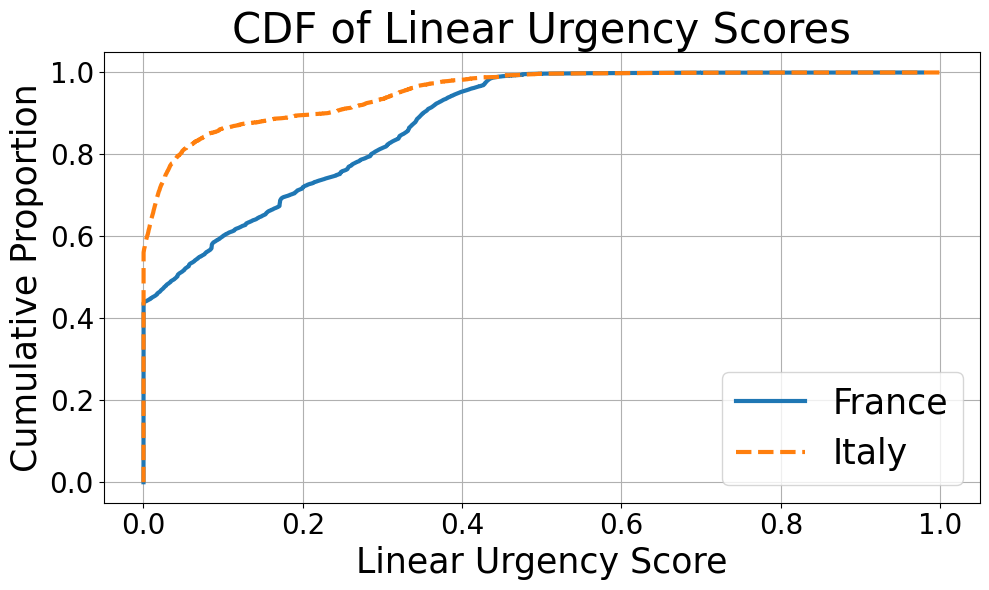

In [49]:
plot_urgency_linear_cdf_comparison(G_fr, G_it, 'France', 'Italy')

In [64]:
def get_parent_nodes_with_edges_by_bvdid(G, bvdid):
    """
    Given a bvdidnumber, find all direct parent nodes (predecessors)
    and return their IDs, attributes, and relationship types from the edges.

    Parameters:
    - G: NetworkX DiGraph
    - bvdid: the target bvdidnumber

    Returns:
    - List of dicts with keys: 'parent_id', 'parent_attrs', 'relationship'
    """
    # Find the node with this bvdidnumber
    matches = [n for n, data in G.nodes(data=True) if data.get('bvdidnumber') == bvdid]
    if not matches:
        print(f"No node found with bvdidnumber = {bvdid}")
        return []

    node_id = matches[0]
    parents = []
    for u, v, edge_data in G.in_edges(node_id, data=True):
        parents.append({
            'parent_id': u,
            'parent_attrs': G.nodes[u],
            'relationship': edge_data.get('relationship', 'unknown')
        })
    return parents

In [66]:
get_parent_nodes_with_edges_by_bvdid(G_it, 'IT05425630968')

[{'parent_id': 'IT05425630968',
  'parent_attrs': {'Unnamed: 0.1': '336411',
   'Unnamed: 0': '9416702',
   'ID_NOTICE_CAN': '2019448872',
   'TED_NOTICE_URL': 'ted.europa.eu/udl?uri=TED:NOTICE:448872-2019:TEXT:EN:HTML',
   'YEAR': '2019',
   'ID_TYPE': '3',
   'DT_DISPATCH': '19/09/19',
   'XSD_VERSION': 'R209.S3',
   'CANCELLED': '0',
   'CORRECTIONS': '0',
   'B_MULTIPLE_CAE': 'N',
   'CAE_NAME': 'Agenzia delle Dogane e dei Monopoli — Direzione Centrale Gestione Tributi e monopolio giochi',
   'CAE_NATIONALID': 'Unknown',
   'CAE_ADDRESS': 'Via della Luce 34A/bis',
   'CAE_TOWN': 'Roma',
   'CAE_POSTAL_CODE': '00153',
   'CAE_GPA_ANNEX': 'A2   ',
   'ISO_COUNTRY_CODE': 'IT',
   'ISO_COUNTRY_CODE_GPA': 'IT',
   'B_MULTIPLE_COUNTRY': 'N',
   'ISO_COUNTRY_CODE_ALL': 'Unknown',
   'CAE_TYPE': 'N',
   'EU_INST_CODE': 'Unknown',
   'MAIN_ACTIVITY': 'Other',
   'B_ON_BEHALF': 'N',
   'B_INVOLVES_JOINT_PROCUREMENT': 'N',
   'B_AWARDED_BY_CENTRAL_BODY': 'N',
   'TYPE_OF_CONTRACT': 'S',
   'T

In [67]:
def get_procurement_with_three_candidates(G):
    for node, attrs in G.nodes(data=True):
        if attrs.get('type') == 'Procurement':
            candidates = [
                u for u, v, data in G.in_edges(node, data=True)
                if data.get('relationship') == 'WON' and G.nodes[u].get('bid_winner') == 'True'
            ]
            if len(candidates) == 3:
                return node, candidates
    return None, []

def trace_ownership_structure(G, company_id):
    structure = []
    for parent, child, data in G.in_edges(company_id, data=True):
        if data.get('relationship') in {'SUBSIDIARY_OF', 'SHAREHOLDER_OF', 'DOMESTIC_ULTIMATE_OWNER_OF', 'GLOBAL_ULTIMATE_OWNER_OF'}:
            structure.append({
                'parent_id': parent,
                'parent_name': G.nodes[parent].get('the_name', 'Unknown'),
                'relationship': data['relationship'],
                'stake': G.nodes[parent].get('shareholderdirect') or G.nodes[parent].get('subsidiarydirect') or 'n/a'
            })
    return structure

def display_procurement_and_candidates(G):
    p_node, candidates = get_procurement_with_three_candidates(G)
    if not p_node:
        print("❌ No procurement found with exactly 3 candidates.")
        return

    print(f"\n📦 Procurement: {p_node}")
    for idx, c in enumerate(candidates, 1):
        print(f"\n🏢 Candidate {idx}: {G.nodes[c].get('the_name', 'Unknown')} (Node ID: {c})")
        print("  Ownership structure:")
        for entry in trace_ownership_structure(G, c):
            print(f"    ← {entry['relationship']}: {entry['parent_name']} (Stake: {entry['stake']})")

In [69]:
get_procurement_with_three_candidates(G_fr)

('76', ['FR490155397', 'FR432105450', 'FR342620267'])

In [79]:
def get_procurement_subgraph(G, procurement_id, ownership_rels=None):
    if ownership_rels is None:
        ownership_rels = {
            'SUBSIDIARY_OF',
            'SHAREHOLDER_OF',
            'DOMESTIC_ULTIMATE_OWNER_OF',
            'GLOBAL_ULTIMATE_OWNER_OF'
        }

    nodes_to_include = {procurement_id}
    edges_to_include = []

    # Step 1: find candidate companies
    candidates = [
        u for u, v, data in G.in_edges(procurement_id, data=True)
        if data.get('relationship') == 'WON' and G.nodes[u].get('bid_winner') == 'True'
    ]

    for c in candidates:
        nodes_to_include.add(c)
        edges_to_include.append((c, procurement_id))

        # Step 2: recursively trace all parents of each candidate
        stack = [c]
        visited = set()
        while stack:
            current = stack.pop()
            for parent, child, data in G.in_edges(current, data=True):
                if data.get('relationship') in ownership_rels and parent not in visited:
                    visited.add(parent)
                    nodes_to_include.add(parent)
                    edges_to_include.append((parent, current))
                    stack.append(parent)

    # Create a new graph and copy nodes and their attributes
    subG = nx.DiGraph()
    for node in nodes_to_include:
        subG.add_node(node, **G.nodes[node])

    # Copy edge attributes
    for u, v in edges_to_include:
        if G.has_edge(u, v):
            subG.add_edge(u, v, **G[u][v])

    return subG

In [80]:
subG = get_procurement_subgraph(G_fr, '76')

In [81]:
subG.nodes()

NodeView(('FR823782487', '76', 'FR342620267', 'FR*20642064', 'FR490155397', 'FR*110310091763', 'FR432105450'))

In [82]:
save_graph(subG, 'subgraph')

✅ Graph saved to procurement_graph_subgraph_clean.graphml


In [89]:
attributes = subG.nodes['FR823782487']

In [90]:
attributes

{'bvdidnumber': 'FR432105450',
 'shareholdercommentstext': 'Unknown',
 'shareholdername': 'NATAN HOLDING',
 'shareholdersalutation': 'Unknown',
 'shareholderfirstname': 'Unknown',
 'shareholderlastname': 'Unknown',
 'shareholderbvdidnumber': 'FR823782487',
 'shareholdercountryisocode': 'FR',
 'shareholdercity': 'ITTEVILLE',
 'shareholdertype': 'Corporate',
 'shareholdersameorsimilarnameinth': 'No',
 'shareholdercompanytakingliabilit': 'No',
 'shareholderdirect': '100.00',
 'shareholdertotal': '100.00',
 'shareholderinformationonpossible': 'Unknown',
 'shareholderinformationsource': 'WW',
 'shareholderinformationdate': '2022/01',
 'shareholderalsoamanager': 'Not a manager',
 'type': 'Company',
 'the_name': 'NATAN HOLDING',
 'the_country': 'FR',
 'the_town': 'ITTEVILLE',
 'screening': "{'match_found': False}"}